# Business Objective

### To create an employee cluster to show absenteeism at work and try to identify the top contributors for it


# Import required Python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
pd.set_option('display.max_columns', None)

# Load the dataset

In [2]:
df=pd.read_csv('Clustering_AbsenteeismAtWork_Data_Project.csv',sep=';')
df.head(20)


ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0   11                  26                 7                3        1   
1   36                   0                 7                3        1   
2    3                  23                 7                4        1   
3    7                   7                 7                5        1   
4   11                  23                 7                5        1   
5    3                  23                 7                6        1   
6   10                  22                 7                6        1   
7   20                  23                 7                6        1   
8   14                  19                 7                2        1   
9    1                  22                 7                2        1   
10  20                   1                 7                2        1   
11  20                   1                 7                3        1   
12  20                  11                 7                4        1   
13   3                  11                 7                4        1   
14   3                  23                 7                4        1   
15  24                  14                 7                6        1   
16   3                  23                 7                6        1   
17   3                  21                 7                2        1   
18   6                  11                 7                5        1   
19  33                  23                 8                4        1   

    Transportation expense  Distance from Residence to Work  Service time  \
0                      289                               36            13   
1                      118                               13            18   
2                      179                               51            18   
3                      279                                5            14   
4                      289                               36            13   
5                      179                               51            18   
6                      361                               52             3   
7                      260                               50            11   
8                      155                               12            14   
9                      235                               11            14   
10                     260                               50            11   
11                     260                               50            11   
12                     260                               50            11   
13                     179                               51            18   
14                     179                               51            18   
15                     246                               25            16   
16                     179                               51            18   
17                     179                               51            18   
18                     189                               29            13   
19                     248                               25            14   

    Age  Work load Average/day   Hit target  Disciplinary failure  Education  \
0    33                 239.554          97                     0          1   
1    50                 239.554          97                     1          1   
2    38                 239.554          97                     0          1   
3    39                 239.554          97                     0          1   
4    33                 239.554          97                     0          1   
5    38                 239.554          97                     0          1   
6    28                 239.554          97                     0          1   
7    36                 239.554          97                     0          1   
8    34                 239.554          97                     0          1   
9    37                 239.554

# Check the structure of data

In [3]:
df.shape #1 shape()

(740, 21)

# Summarise the data

In [4]:
df.describe() #2 summarize the data

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day   Hit target  \
count    740.000000  740.000000              740.000000  740.000000   
mean      12.554054   36.450000              271.490235   94.587838   
std        4.384873    6.478772               39.058116    3.779313   
min        1.000000   27.000000              205.917000   81.000000   
25%        9.000000   31.000000              244.387000   93.000000   
50%       13.000000   37.000000              264.249000   95.000000   
75%       16.000000   40.000000              294.217000   97.000000   
max       29.000000   58.000000              378.884000  100.000000   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

# Check if there is any missing value

In [6]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [7]:
# Checking data types
df.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

In [8]:
for cols in df.columns:
    print(round(df[cols].value_counts()))
    print('-'*20)

3     113
28     76
34     55
22     46
20     42
11     40
15     37
36     34
24     30
14     29
33     24
10     24
1      23
17     20
5      19
18     16
13     15
25     10
9       8
6       8
23      8
27      7
12      7
30      7
2       6
7       6
26      5
32      5
29      5
19      3
21      3
31      3
8       2
16      2
4       1
35      1
Name: ID, dtype: int64
--------------------
23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
21      6
8       6
9       4
5       3
16      3
24      3
15      2
4       2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64
--------------------
3     87
2     72
10    71
7     67
5     64
11    63
8     54
6     54
9     53
4     53
1     50
12    49
0      3
Name: Month of absence, dtype: int64
--------------------
2    161
4    156
3    154
6    144
5    125
Name: Day of the week, dtype: int64


# We see that Month of absence is 0 so there cant be month 0 so we will replace it by mode.

In [9]:
df['Month of absence'].mode()[0] # mode is 3
df['Month of absence'].replace(to_replace=0,value=3,inplace=True)

In [10]:
d=df.copy()

In [11]:
def num_graph(n):
    print(d[n].describe())
    plt.figure(figsize=(15,5),facecolor='beige')
    print('                                   ', 'Distribution of ',d[n].name)
    #plt.suptitle(d[n])
    plt.subplot(131)
    sns.histplot(x = d[n], color = "red",bins=(10)) 
    plt.subplot(132)
    sns.boxplot(x = d[n], color = "brown") 
    plt.subplot(133)
    sns.kdeplot(x=d[n],color='green',shade=True)
    plt.show()
def cat_graph(c):
    print(d[c].value_counts())
    plt.figure(figsize=(15,7),facecolor='beige')
    plt.subplot(121)
    sns.countplot(y=d[c],ec='black',palette='gist_rainbow')
    plt.yticks(rotation=45)
    plt.subplot(122)
    perc=d[c].value_counts()
    lbl=list(d[c].value_counts().index)
    plt.pie(perc,labels=lbl,autopct='%.2f%%',startangle=50)
    plt.show()
    

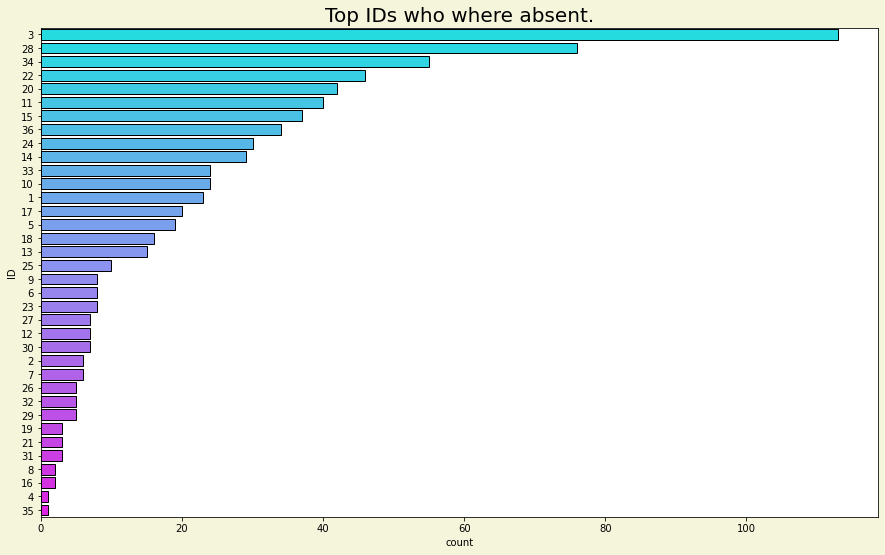

In [13]:
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top IDs who where absent.',fontsize=(20))
sns.countplot(y=d['ID'],ec='black',palette='cool',order = df['ID'].value_counts().index);


# Conclusion: Most absent ID is ID number 3,28,34,22 and 20 have value count of 40 plus.

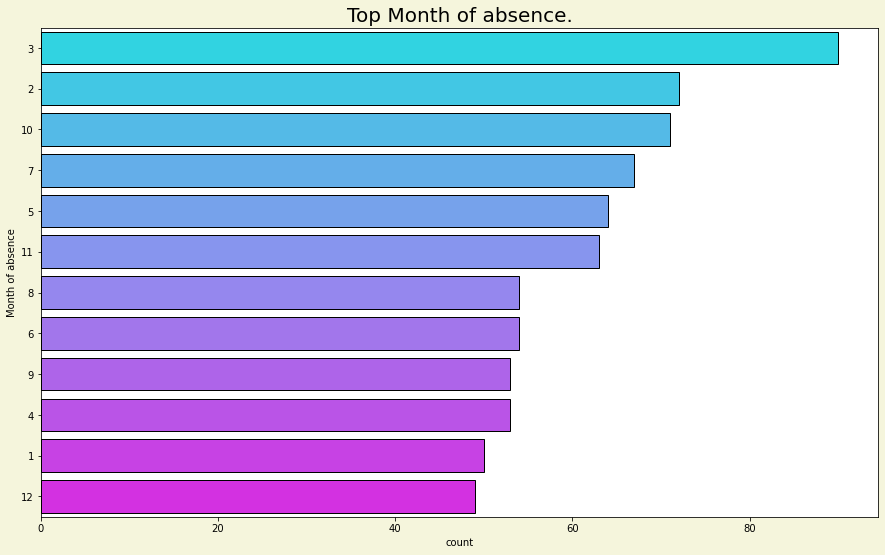

In [14]:
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top Month of absence.',fontsize=(20))
sns.countplot(y=d['Month of absence'],ec='black',palette='cool',order = df['Month of absence'].value_counts().index);


# Conclusion : Most holidays are taken in the month of march(3).

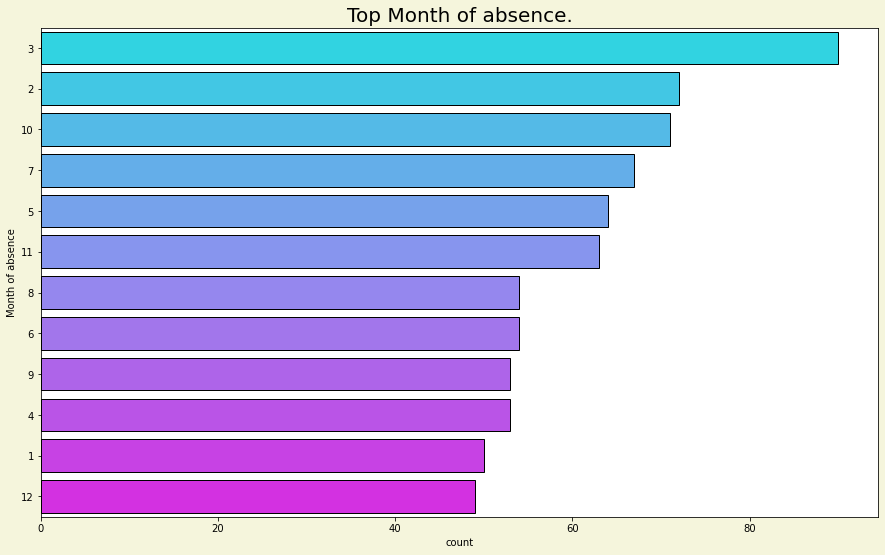

In [15]:
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top Month of absence.',fontsize=(20))
sns.countplot(y=d['Month of absence'],ec='black',palette='cool',order = df['Month of absence'].value_counts().index);


# Conclusion: Top month of absence is 3rd month and least month of absent is 12th month.

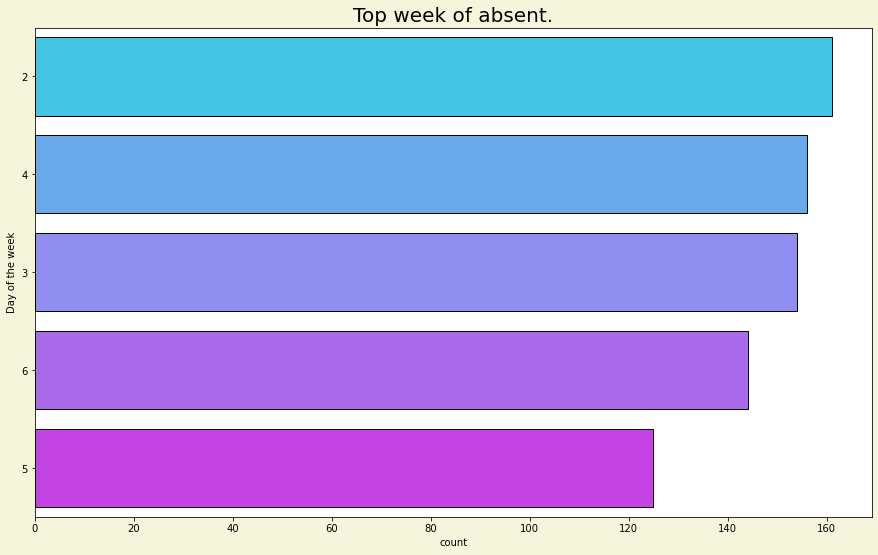

In [16]:
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top week of absent.',fontsize=(20))
sns.countplot(y=d['Day of the week'],ec='black',palette='cool',order = df['Day of the week'].value_counts().index);


# Conclusion: Top week of absent is the second week of the month were the employees take most of the holidays.

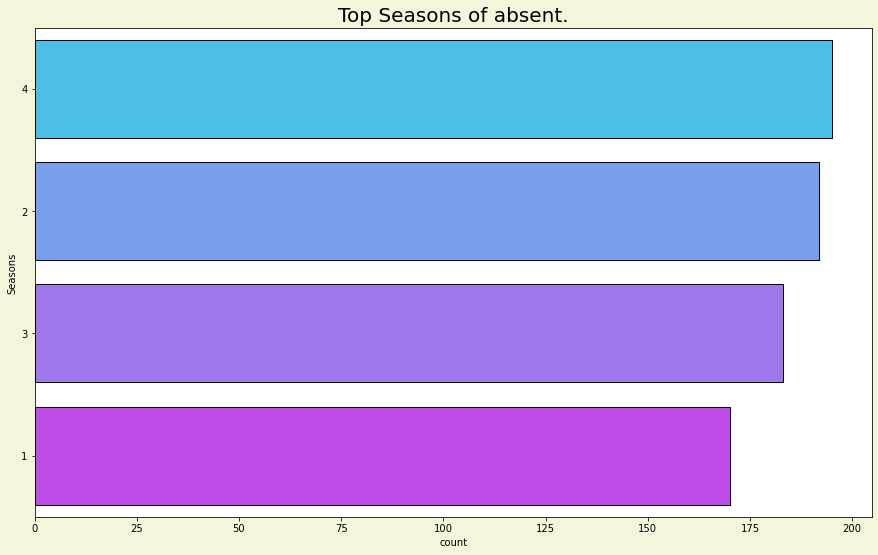

In [17]:
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top Seasons of absent.',fontsize=(20))
sns.countplot(y=d['Seasons'],ec='black',palette='cool',order = df['Seasons'].value_counts().index);


# Conclusion: The 4th season are the season were most of the absent. 

count    740.000000
mean     221.329730
std       66.952223
min      118.000000
25%      179.000000
50%      225.000000
75%      260.000000
max      388.000000
Name: Transportation expense, dtype: float64
                                    Distribution of  Transportation expense


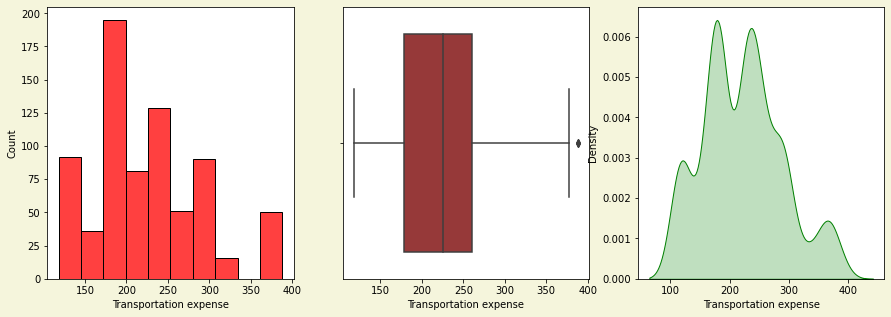

In [18]:
num_graph('Transportation expense')

# Conclusion: The mean Transportation expense is 221.

count    740.000000
mean      29.631081
std       14.836788
min        5.000000
25%       16.000000
50%       26.000000
75%       50.000000
max       52.000000
Name: Distance from Residence to Work, dtype: float64
                                    Distribution of  Distance from Residence to Work


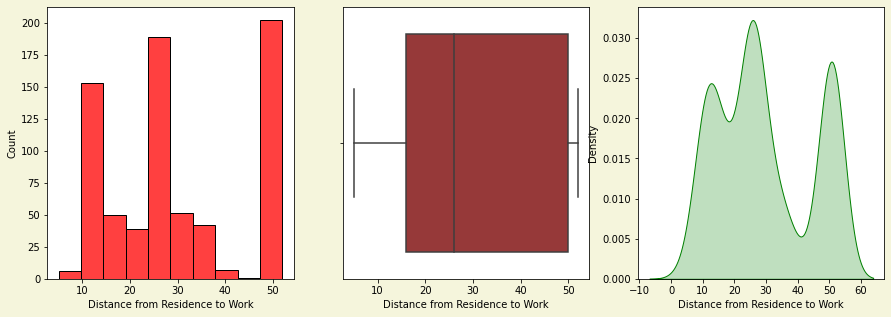

In [19]:
num_graph('Distance from Residence to Work')

# Conclusion:The mean Distance from Residence to Work is 29 ,while most of the people are 10,28 and 50 Distance from Residence to Work.

count    740.000000
mean      12.554054
std        4.384873
min        1.000000
25%        9.000000
50%       13.000000
75%       16.000000
max       29.000000
Name: Service time, dtype: float64
                                    Distribution of  Service time


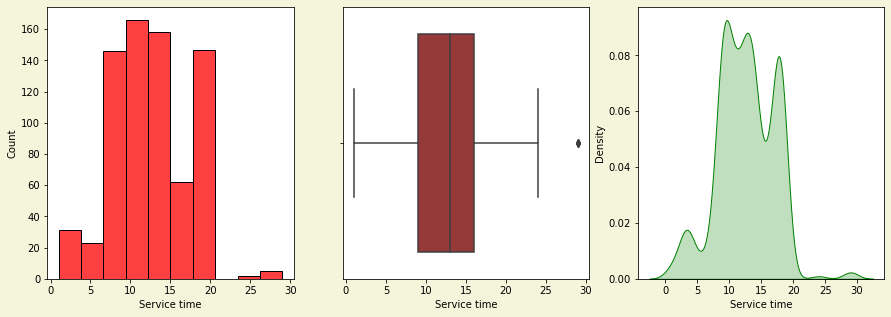

In [20]:
num_graph('Service time')

# Conclusion: Mean service time is 12. Most of the Service time are from 9-16

count    740.000000
mean      36.450000
std        6.478772
min       27.000000
25%       31.000000
50%       37.000000
75%       40.000000
max       58.000000
Name: Age, dtype: float64
                                    Distribution of  Age


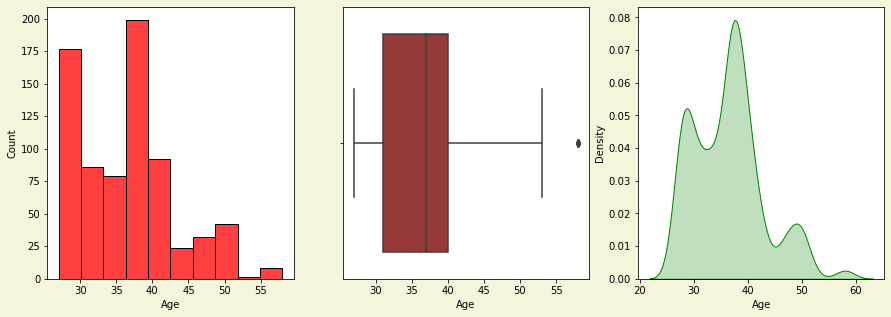

In [21]:
num_graph('Age')

# Conclusion : Mean age is 36 ,while people of age 38-39 are more.

count    740.000000
mean     271.490235
std       39.058116
min      205.917000
25%      244.387000
50%      264.249000
75%      294.217000
max      378.884000
Name: Work load Average/day , dtype: float64
                                    Distribution of  Work load Average/day 


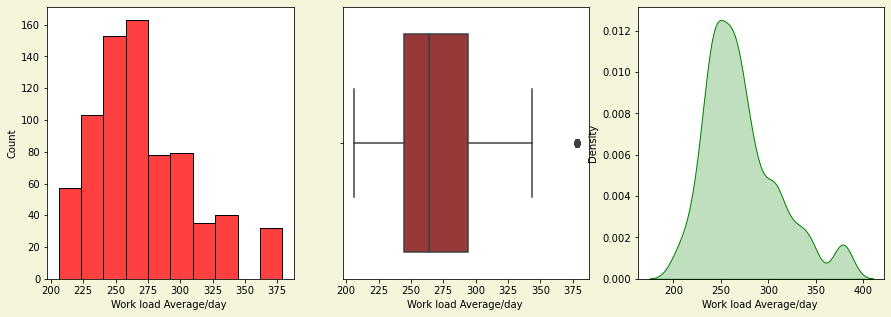

In [22]:
num_graph('Work load Average/day ')

# Conclusion :Mean Work load Average/day is 271 while there is outliers present in Work load Average/day at 378.

93     105
99     102
97      89
92      79
95      75
96      75
98      66
91      45
94      34
88      28
81      19
87      12
100     11
Name: Hit target, dtype: int64


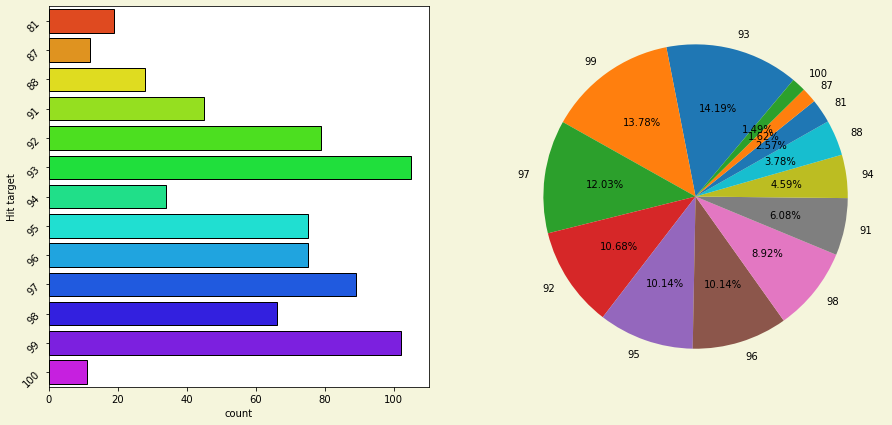

In [23]:
cat_graph('Hit target')

# CONCLUSION : Most of the employee have target hit of 92 and 99.

0    700
1     40
Name: Disciplinary failure, dtype: int64


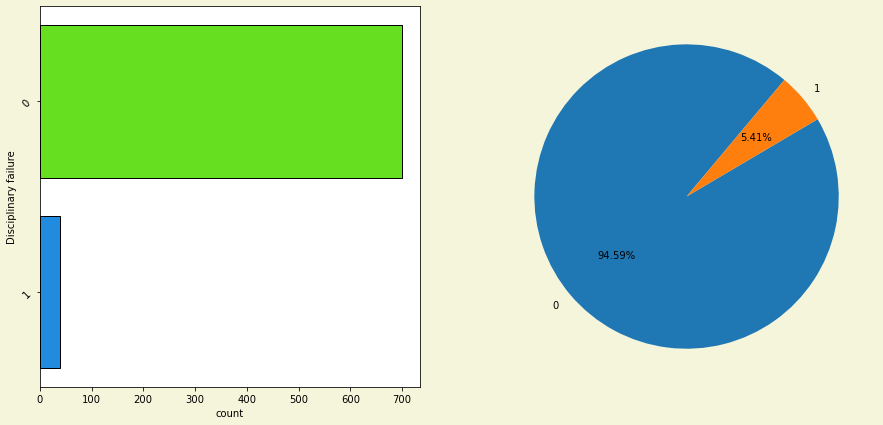

In [24]:
cat_graph('Disciplinary failure')

# Conclusion: 5.4% of people were not able to follow Disciplinary while 94.5% followed Disciplinary.

1    611
3     79
2     46
4      4
Name: Education, dtype: int64


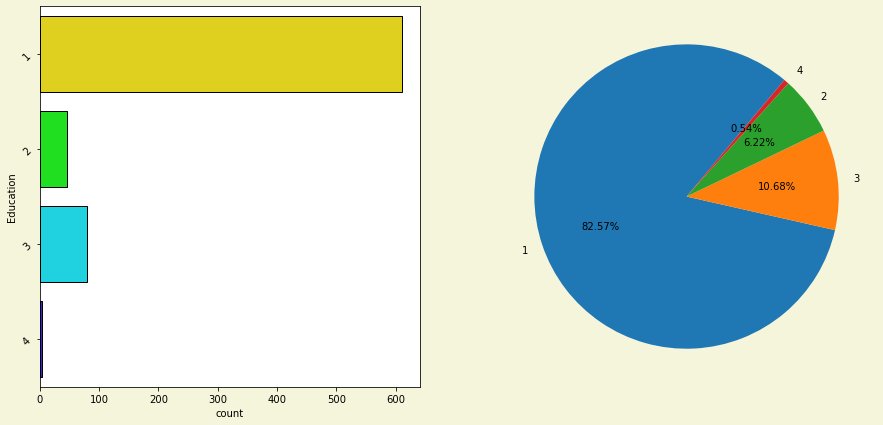

In [25]:
cat_graph('Education')

# Conclusion: 82% of people Education level of 1.while 10.6% of people have Education level 3.

0    298
1    229
2    156
4     42
3     15
Name: Son, dtype: int64


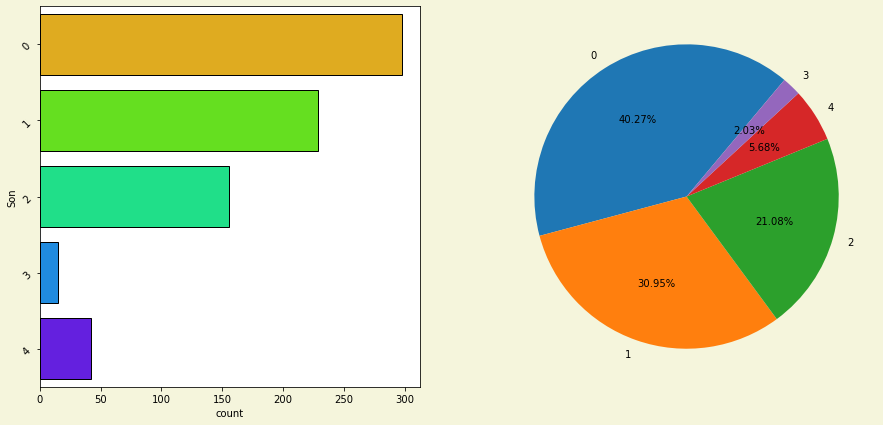

In [26]:
cat_graph('Son')

# Conclusion: 40% of people have 0 children count,while 30% of people have 1 chilren.

1    420
0    320
Name: Social drinker, dtype: int64


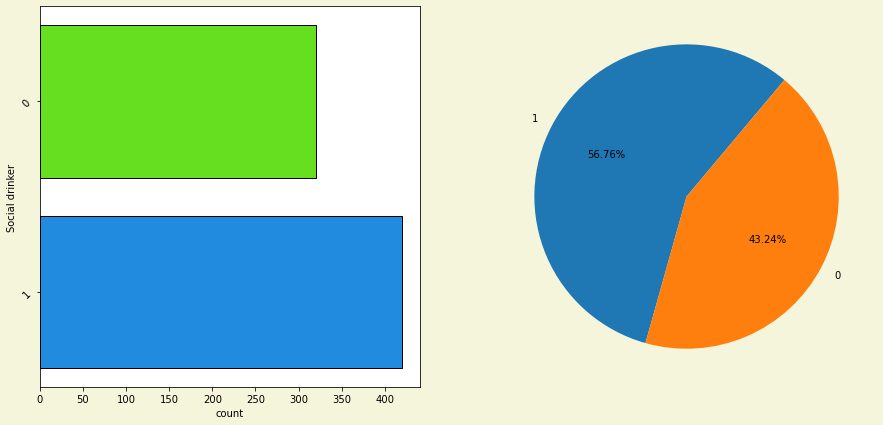

In [27]:
cat_graph('Social drinker')


# Conclusion: 56.7% Of the people are drinker,while 43.24% of people are non drinker.

0    686
1     54
Name: Social smoker, dtype: int64


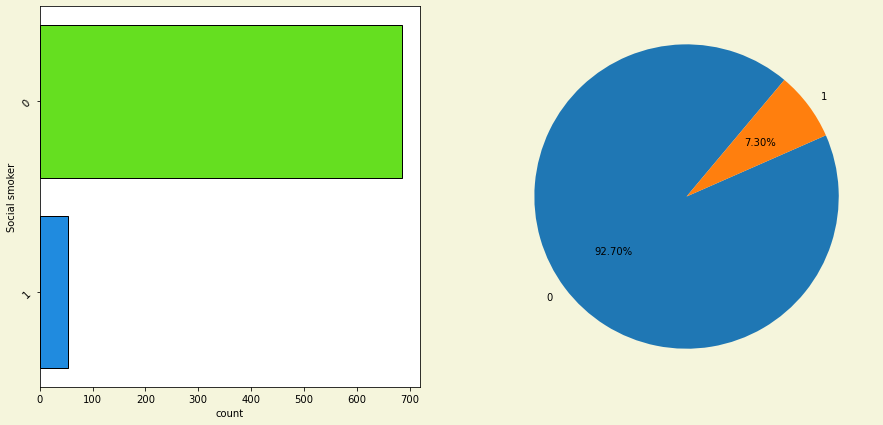

In [28]:
cat_graph('Social smoker')


# Conclusion: 7% Of the people are smoker,while 92.7% of people are non smoker.

0    460
1    138
2     96
4     32
8      8
5      6
Name: Pet, dtype: int64


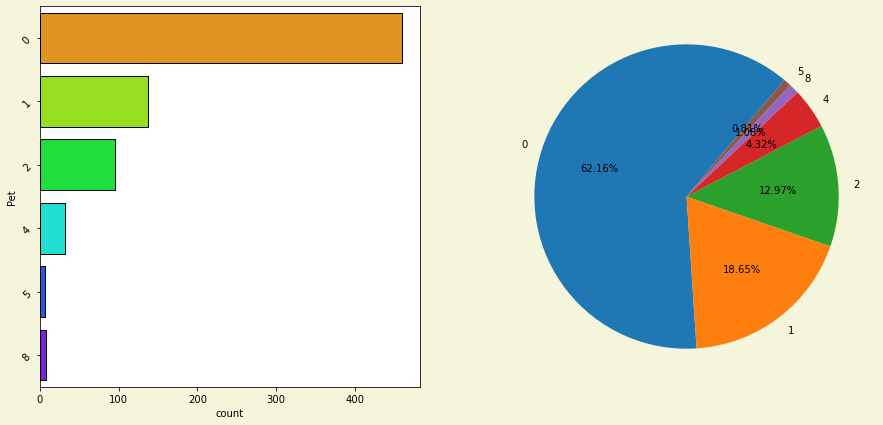

In [29]:
cat_graph('Pet')

# Conclusion: 62% of the people have No pet.while there are 8 people who also have 8 pet.

count    740.000000
mean      79.035135
std       12.883211
min       56.000000
25%       69.000000
50%       83.000000
75%       89.000000
max      108.000000
Name: Weight, dtype: float64
                                    Distribution of  Weight


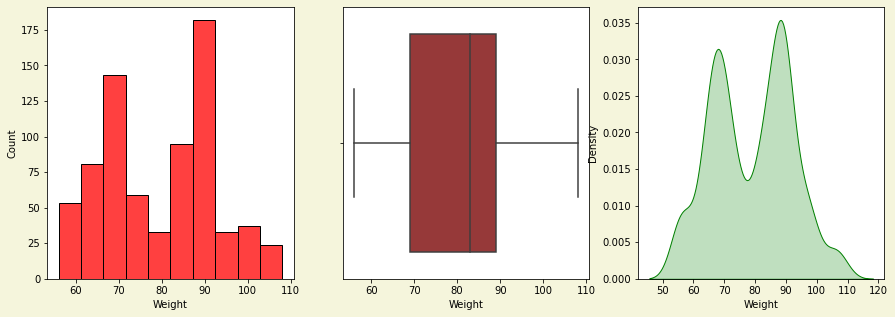

In [30]:
num_graph('Weight')

# #Conclusion: The mean weight is 79 Kg.There is peak in the weights of people at 70 and 90 kg's.

count    740.000000
mean     172.114865
std        6.034995
min      163.000000
25%      169.000000
50%      170.000000
75%      172.000000
max      196.000000
Name: Height, dtype: float64
                                    Distribution of  Height


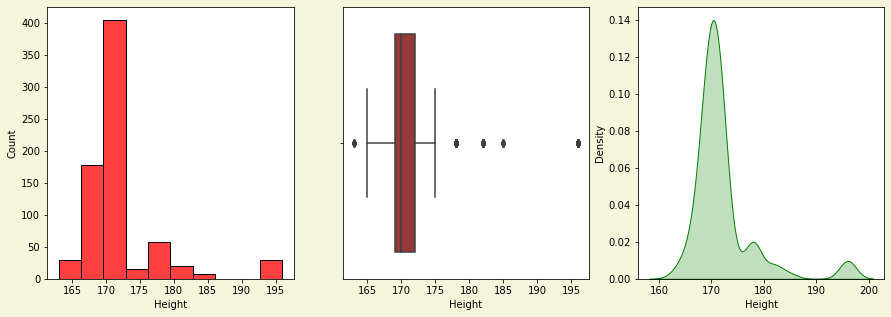

In [31]:
num_graph('Height')

# Conclusion: The mean height is 172cm, Most of the people have almost common height while there are outliers present.

count    740.000000
mean      26.677027
std        4.285452
min       19.000000
25%       24.000000
50%       25.000000
75%       31.000000
max       38.000000
Name: Body mass index, dtype: float64
                                    Distribution of  Body mass index


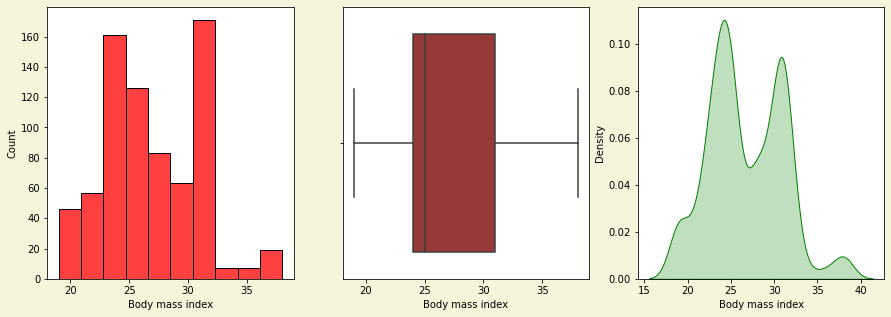

In [32]:
num_graph('Body mass index')

# Conclusion : The mean BMI is 26. while there are less people with BMI above 31.

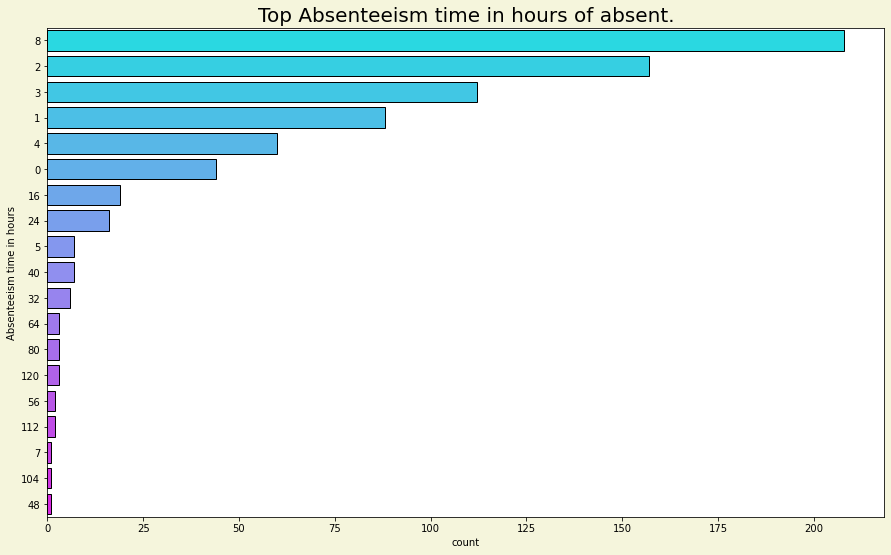

In [33]:
plt.figure(figsize=(15,9),facecolor='beige')
plt.title('Top Absenteeism time in hours of absent.',fontsize=(20))
sns.countplot(y=d['Absenteeism time in hours'],ec='black',palette='cool',order = df['Absenteeism time in hours'].value_counts().index);


# Conclusion : Top Absenteeism time in hours of absent people is 8 hours so we can conclude that most of the absent day can be one.

# Bivariate and Multivariate analysis.

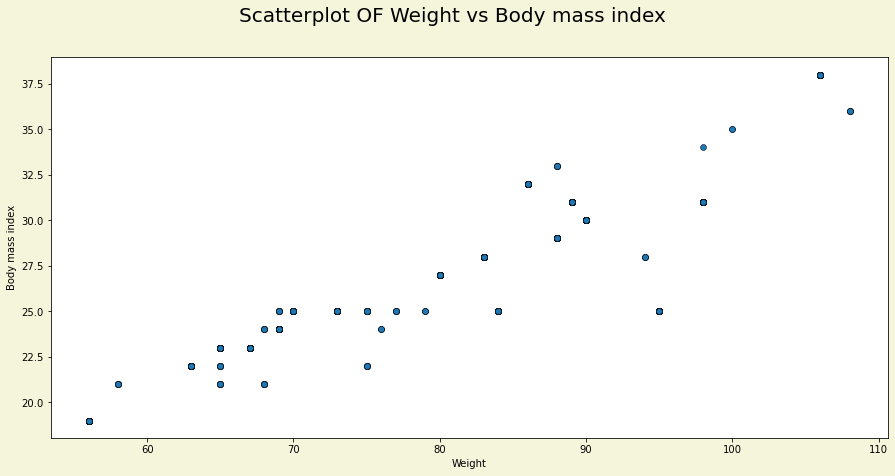

In [34]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Weight vs Body mass index ',fontsize=(20))
sns.scatterplot(data=d,y='Body mass index',x='Weight',ec='black');

# Conclucsion: BMI and weight have positive correlation it shows that as weight increases BMI increases.

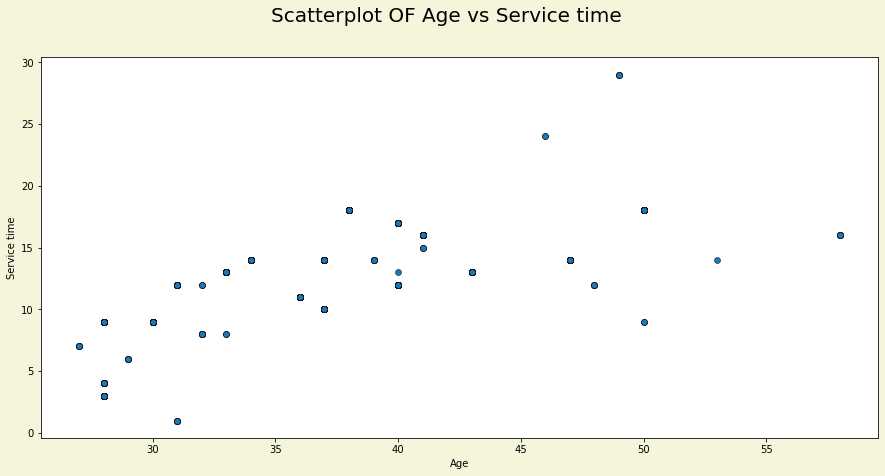

In [35]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Age vs Service time',fontsize=(20))
sns.scatterplot(data=d,y='Service time',x='Age',ec='black');

# Conclusion: As Age increases service time also increases.

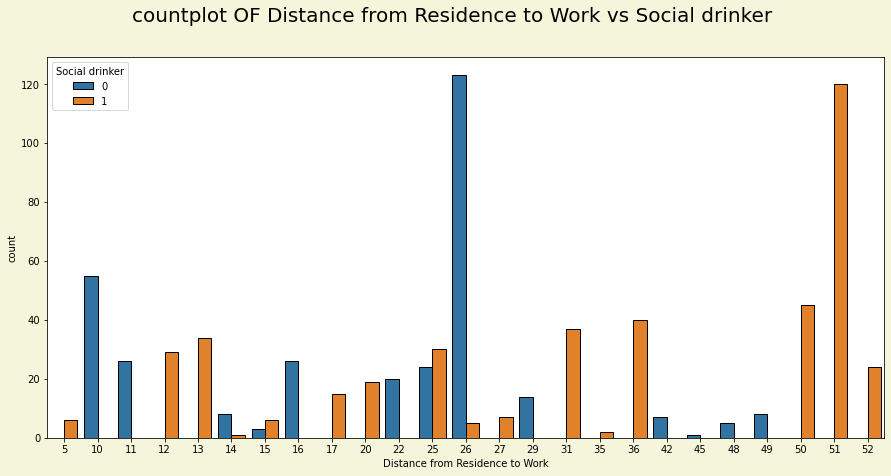

In [36]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('countplot OF Distance from Residence to Work vs Social drinker',fontsize=(20))
sns.countplot(data=d,x='Distance from Residence to Work',hue='Social drinker',ec='black');


# Conclusion: We can see that all people leaving at distance of 12,13,17,20,31,36,50,51 and 52 are Social drinker

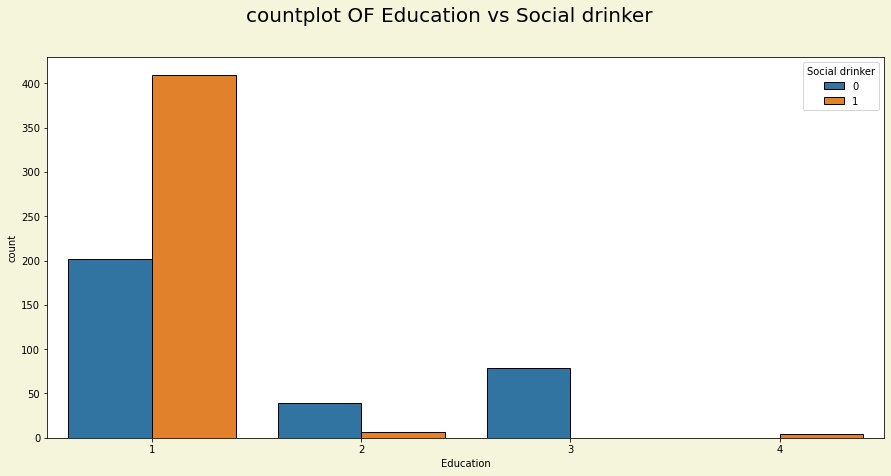

In [37]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('countplot OF Education vs Social drinker ',fontsize=(20))
sns.countplot(data=d,x='Education',hue='Social drinker',ec='black');

# Conclusion:Employees with education 1 are more in count of social drinker . 

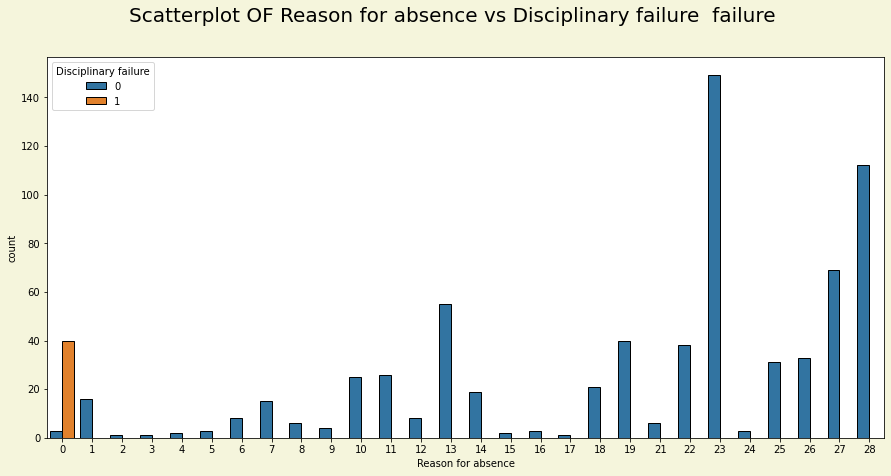

In [38]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Reason for absence vs Disciplinary failure  failure',fontsize=(20))
sns.countplot(data=d,x='Reason for absence',hue='Disciplinary failure',ec='black');

# Conclusion:The employees with Reason for absence 0 have made  Disciplinary failure.

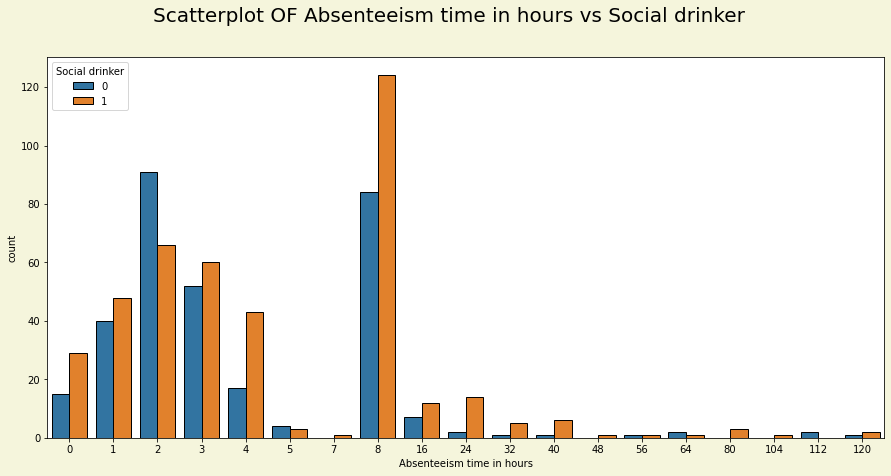

In [39]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Absenteeism time in hours vs Social drinker ',fontsize=(20))
sns.countplot(data=d,x='Absenteeism time in hours',hue='Social drinker',ec='black');

# Conclusion :Employees who are Social drinker are mostly Absent for 8 hours.

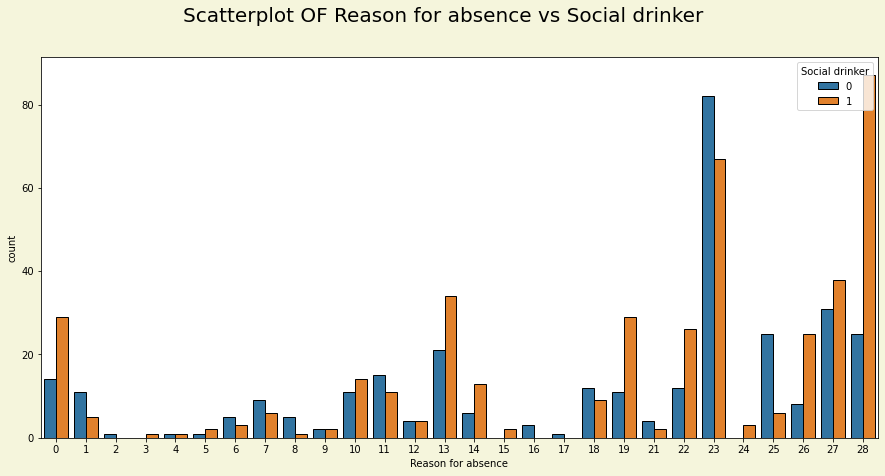

In [40]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Reason for absence vs Social drinker ',fontsize=(20))
sns.countplot(data=d,x='Reason for absence',hue='Social drinker',ec='black');

# Conclusion:Reason for absence 0,13,19 and 28 are mostly used by Social drinker.

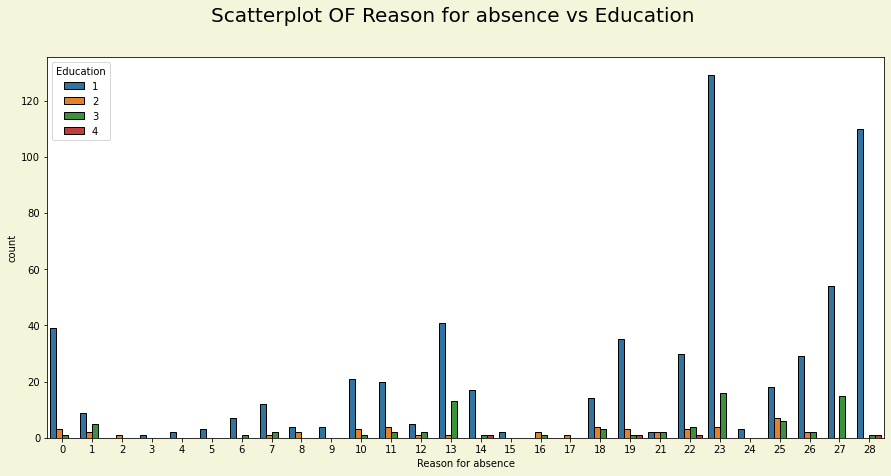

In [41]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Reason for absence vs Education',fontsize=(20))
sns.countplot(data=d,x='Reason for absence',hue='Education',ec='black');

# Conclusion:23rd Reason is most used reason by the education 1 Employees.

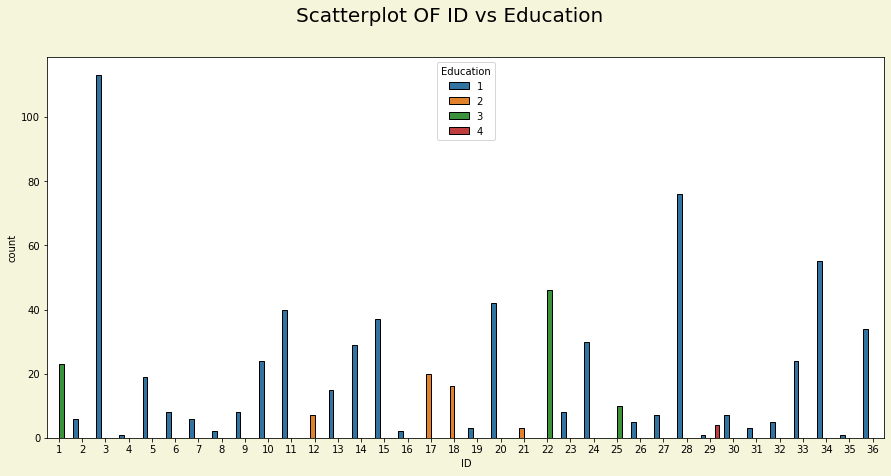

In [42]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF ID vs Education ',fontsize=(20))
sns.countplot(data=d,x='ID',hue='Education',ec='black');

# Conclusion: This graph show the education level of the Id and we can see that employees with education 1 tend to be more absent compared to others Employees.

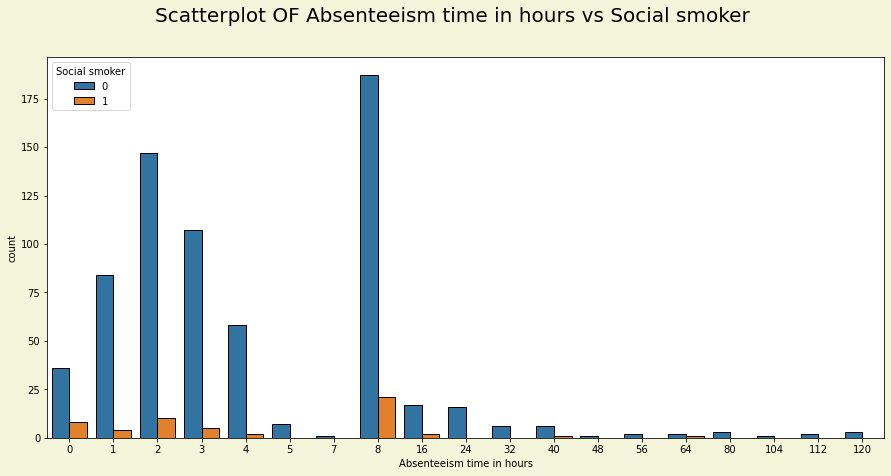

In [43]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Absenteeism time in hours vs Social smoker',fontsize=(20))
sns.countplot(data=d,x='Absenteeism time in hours',hue='Social smoker',ec='black');

# Conclusion: Most of the Employees are non smoker.

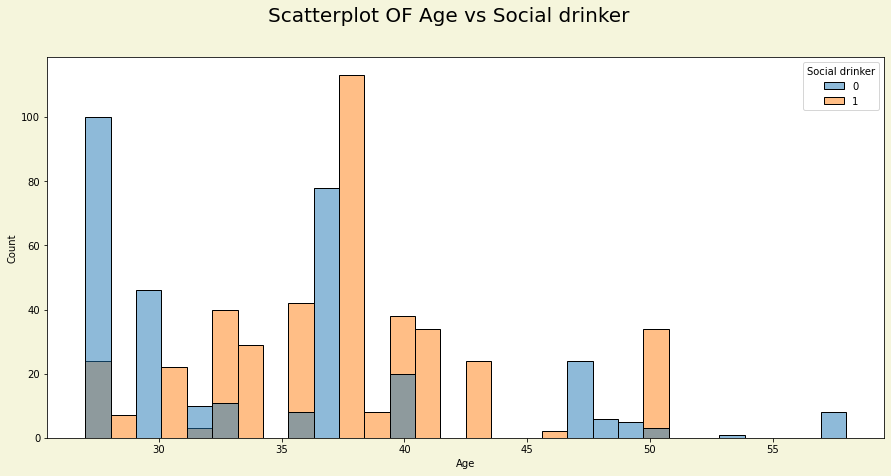

In [44]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Age vs Social drinker ',fontsize=(20))
sns.histplot(data=d,x='Age',hue='Social drinker',bins=30);

# Conclusion:Employees age 38,41 and 43 are all social drinkers.

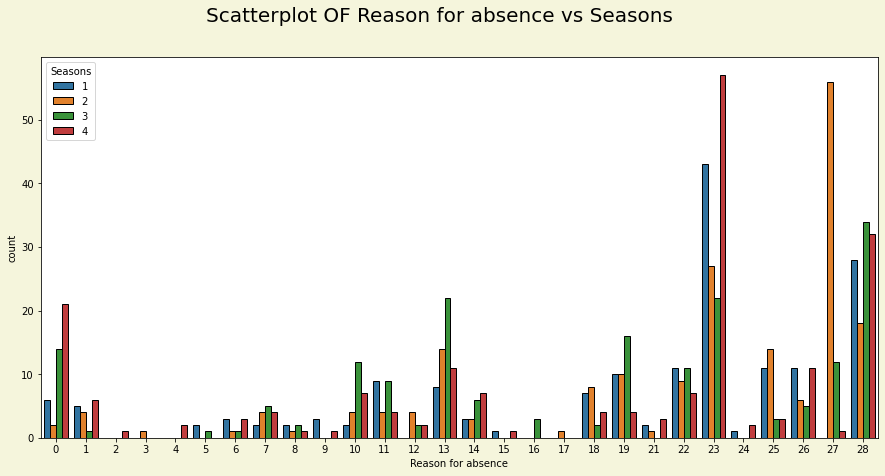

In [45]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.suptitle('Scatterplot OF Reason for absence vs Seasons  ',fontsize=(20))
sns.countplot(data=d,x='Reason for absence',hue='Seasons',ec='black');

# Conclusion : Most common used Reason for absence is 23  are for season 4. while most common reason are 23 and 28.

# Data preprocessing

In [46]:
from sklearn.preprocessing import MinMaxScaler
scaled_df=pd.DataFrame(MinMaxScaler().fit_transform(df.to_numpy()),columns=df.columns)

In [47]:
from sklearn.decomposition import PCA
#FOR PCA
pca = PCA(n_components=2)
df_r=pca.fit(scaled_df).transform(scaled_df)
explained_variance = pca.explained_variance_ratio_
explained_variance      

array([0.22596311, 0.11904674])

Text(0.5, 1.0, 'USING PCA (PRINCIPLE COMPONENT ANALYSIS)')

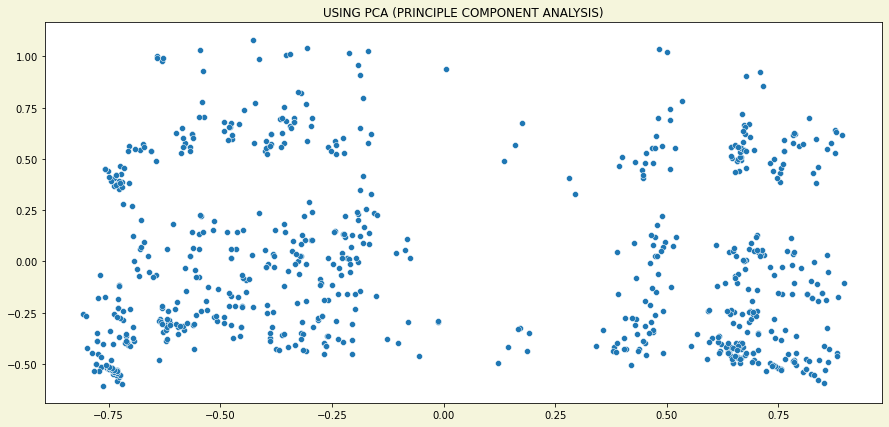

In [48]:
plt.figure(figsize=(15,7),facecolor='beige')
sns.scatterplot(df_r[:,0],df_r[:,1])
plt.title('USING PCA (PRINCIPLE COMPONENT ANALYSIS)')

# Conclusion: From the graph we can see that there is cluster formation.

# Kmeans Clustering

# Finding the optimum value of K using Elbow Method

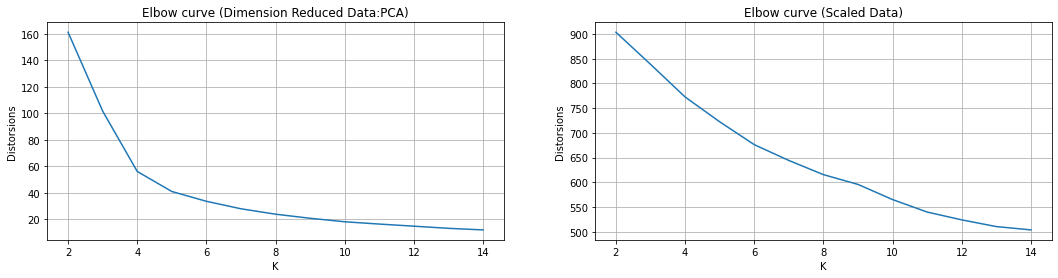

In [49]:
from sklearn.cluster import KMeans
plt.figure(figsize=(18,4))
plt.subplot(121)
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_r)
    distorsions.append(kmeans.inertia_)

plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve (Dimension Reduced Data:PCA)')


plt.subplot(122)
distorsions = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    distorsions.append(kmeans.inertia_)

plt.plot(range(2, 15), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')
plt.title('Elbow curve (Scaled Data)');

In [50]:
#for dimension reduced data : PCA
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_r)
    silhoutte = silhouette_score(df_r, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhoutte)

For n_clusters = 2 The average silhouette_score is : 0.5509615567052978
For n_clusters = 3 The average silhouette_score is : 0.5297110118059984
For n_clusters = 4 The average silhouette_score is : 0.557495951133984
For n_clusters = 5 The average silhouette_score is : 0.5299007752334931
For n_clusters = 6 The average silhouette_score is : 0.48568367505303756
For n_clusters = 7 The average silhouette_score is : 0.4860732342122729
For n_clusters = 8 The average silhouette_score is : 0.4806852856126022
For n_clusters = 9 The average silhouette_score is : 0.4879557540476785
For n_clusters = 10 The average silhouette_score is : 0.49154406746519635


# OBSERVATION : We find that K=4 is the optimum value according to both metrics.

In [51]:
Kmeans_model=KMeans(n_clusters=4)
Kmeans_model.fit(df_r)

KMeans(n_clusters=4)

In [52]:
y_hc= Kmeans_model.fit_predict(df_r)

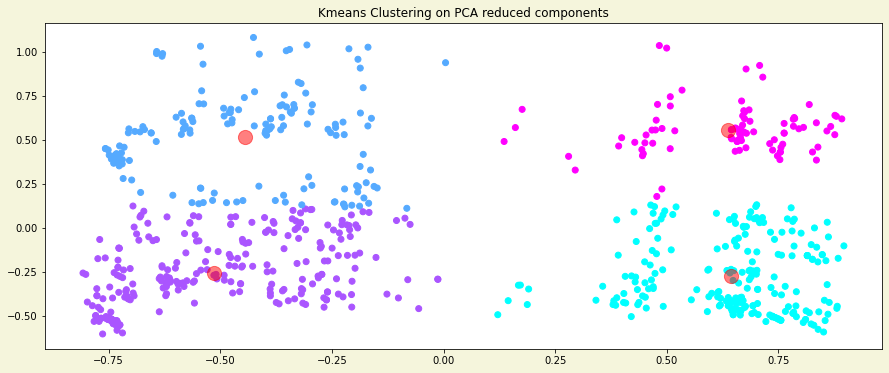

In [54]:
plt.figure(figsize=(15,6),facecolor='beige')
yl = Kmeans_model.labels_
plt.scatter(df_r[:,0],df_r[:,1],c=yl,cmap='cool')
centers = Kmeans_model.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='red',s=200,alpha=0.5)
plt.title('Kmeans Clustering on PCA reduced components');

# Conclusion: There is Four cluster formation with different center point.

In [60]:
#for scaled data 
from sklearn.metrics import silhouette_score
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10,11]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(scaled_df)
    silhoutte = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhoutte)

For n_clusters = 2 The average silhouette_score is : 0.21033754339638658
For n_clusters = 3 The average silhouette_score is : 0.1694997565989547
For n_clusters = 4 The average silhouette_score is : 0.1414168540455713
For n_clusters = 5 The average silhouette_score is : 0.16246161613957066
For n_clusters = 6 The average silhouette_score is : 0.16435976918643275
For n_clusters = 7 The average silhouette_score is : 0.1725912601879024
For n_clusters = 8 The average silhouette_score is : 0.17278816895415494
For n_clusters = 9 The average silhouette_score is : 0.17714327589078724
For n_clusters = 10 The average silhouette_score is : 0.18296645915677076
For n_clusters = 11 The average silhouette_score is : 0.19150377016794107


In [61]:
Kmeans_model3=KMeans(n_clusters=11)
Kmeans_model3.fit(scaled_df)

KMeans(n_clusters=11)

In [62]:
y_hc3= Kmeans_model3.fit_predict(scaled_df)


In [66]:
kmeans_scaled_df=scaled_df.copy()
kmeans_scaled_df['y_hc3']=y_hc3

In [81]:
kmeans_scaled_df.y_hc3.value_counts()

1     109
2     106
6      97
8      73
4      70
7      64
0      61
9      42
3      40
5      39
10     39
Name: y_hc3, dtype: int64

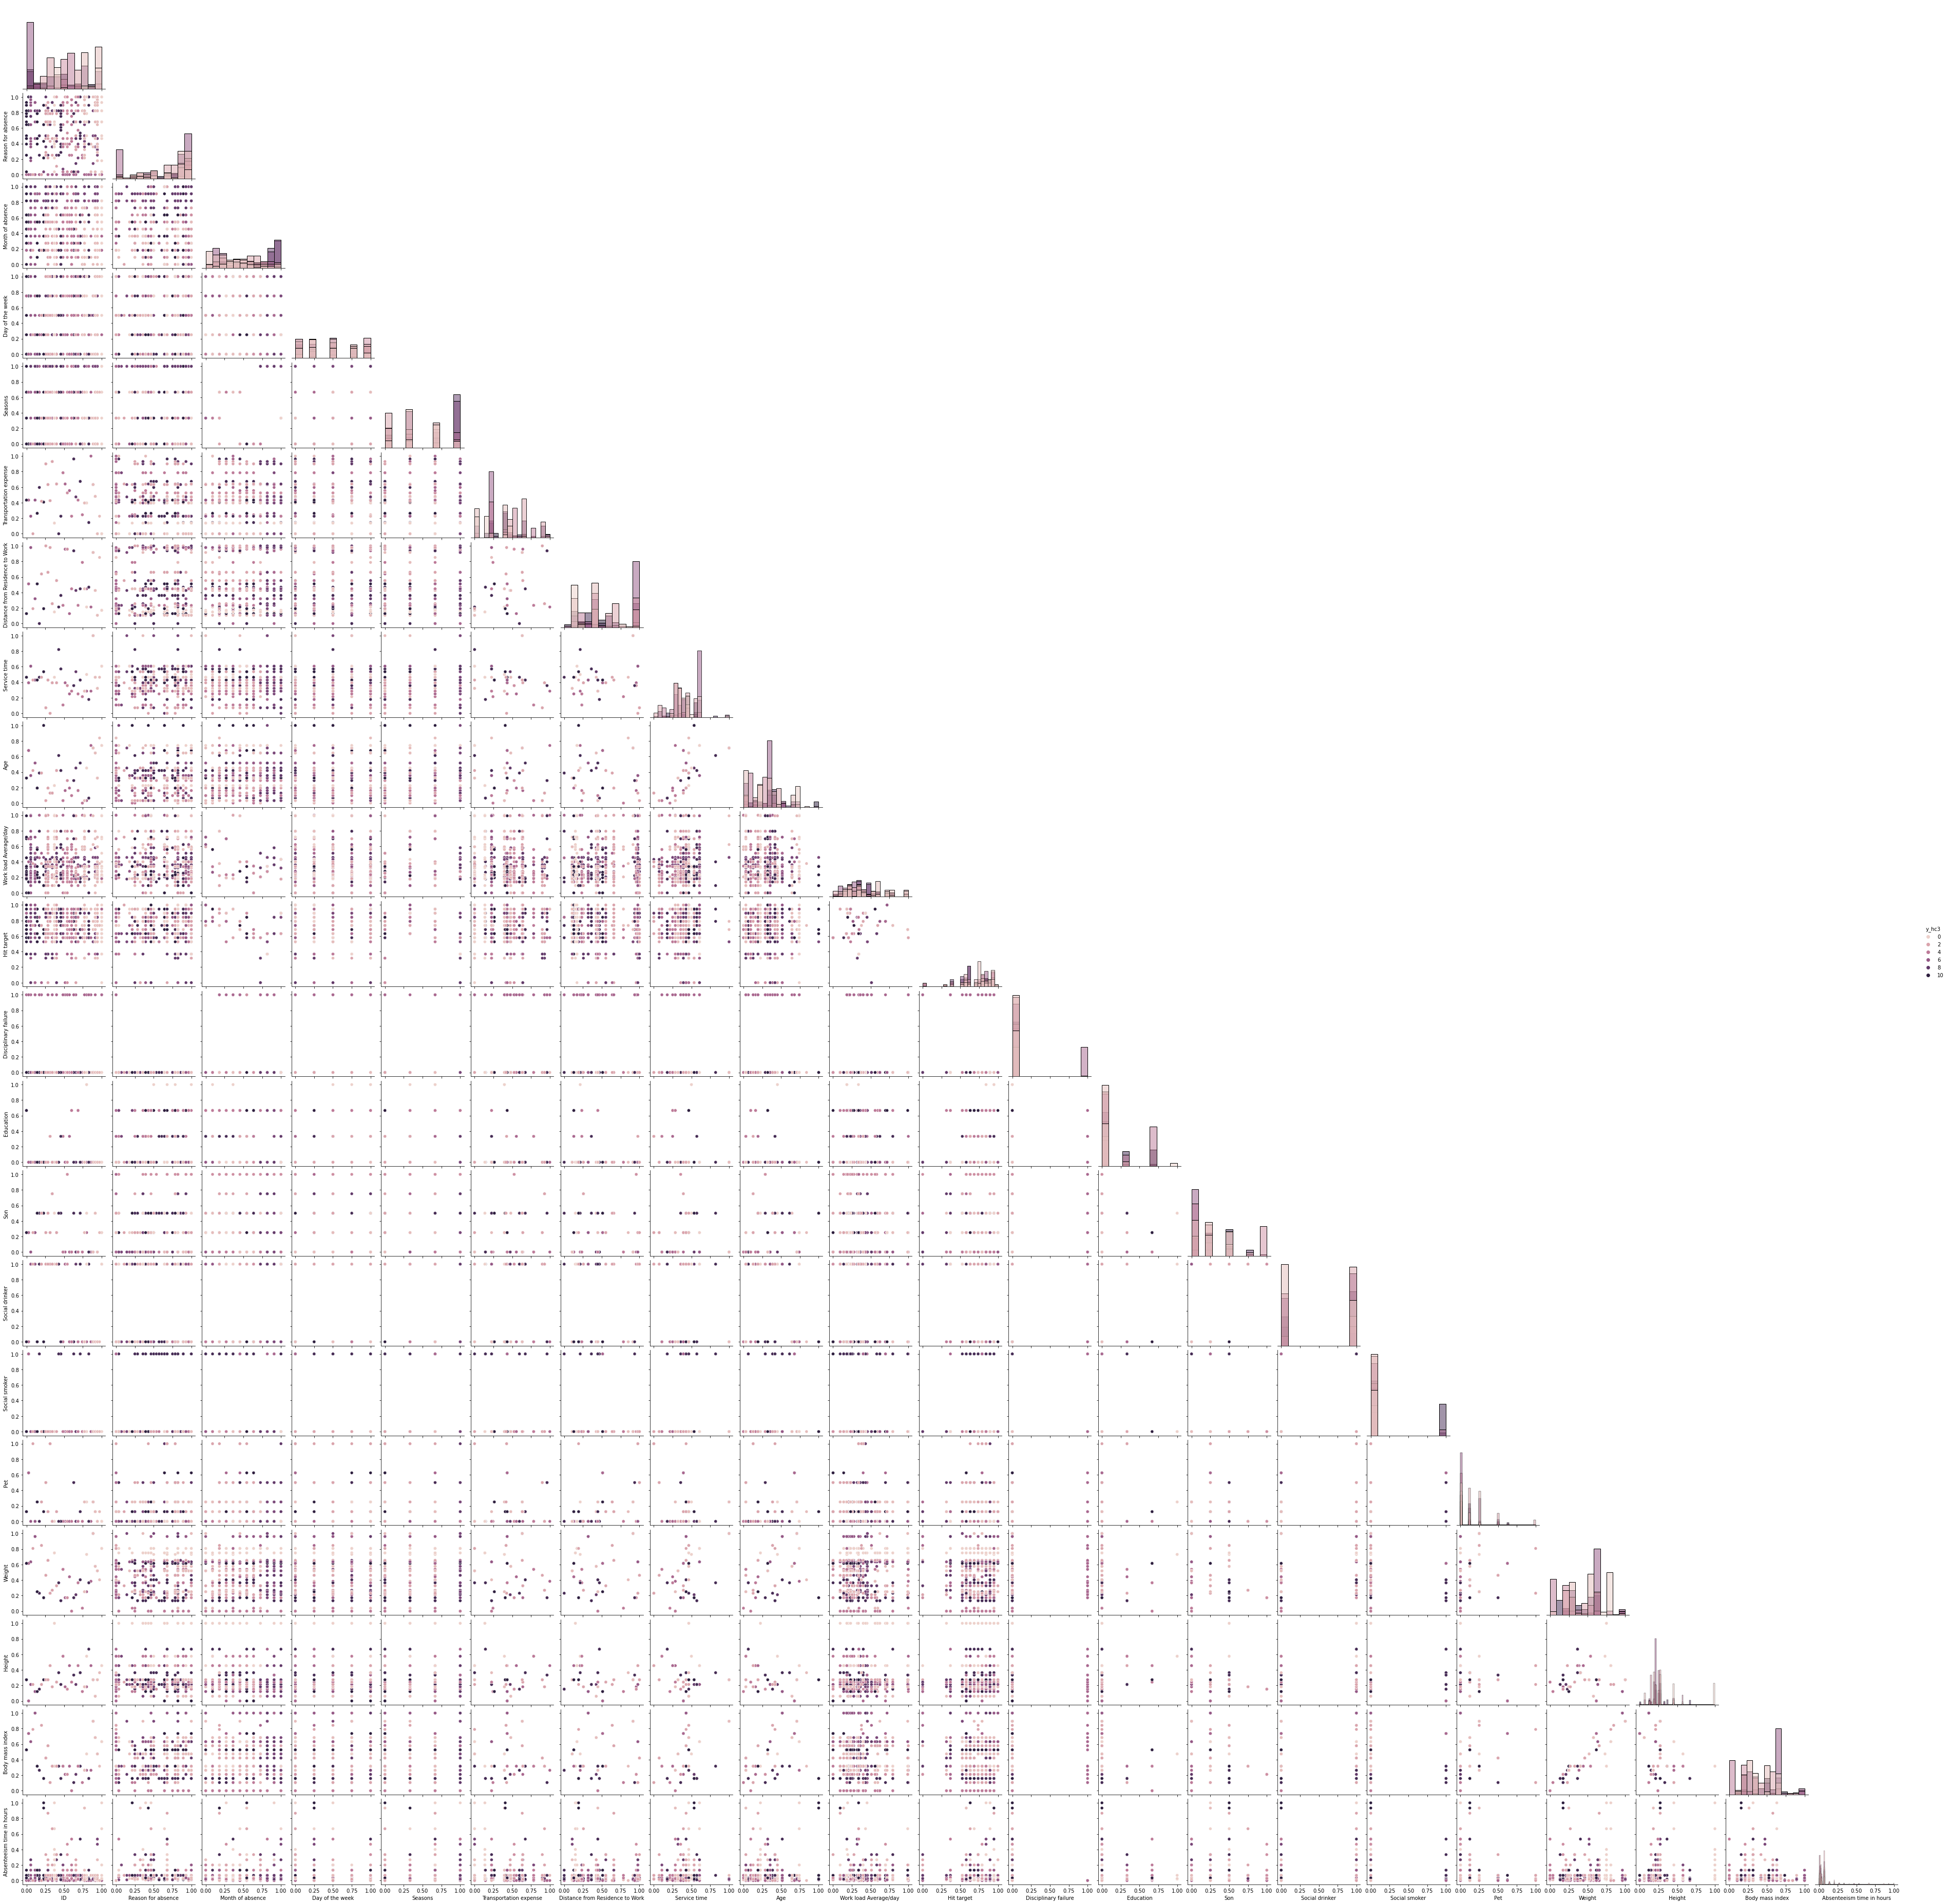

In [69]:
sns.set_palette("bright")
sns.pairplot(kmeans_scaled_df, diag_kind="hist", hue ="y_hc3", corner=True)
plt.show()

# Agglomerative Hierarchical clustering algorithm

In [70]:
df_r_df=pd.DataFrame(df_r)

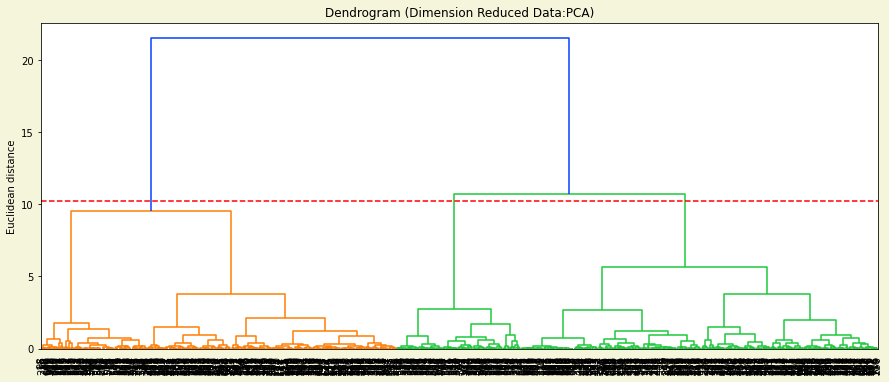

In [71]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,6),facecolor='beige')
dendrogrm = sch.dendrogram(sch.linkage(df_r_df, method = 'ward'),labels=df_r_df.index)
plt.axhline(y=10.2, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram (Dimension Reduced Data:PCA)')
plt.ylabel('Euclidean distance')
plt.show()

# Conclusion: We will consider n_clusters =3

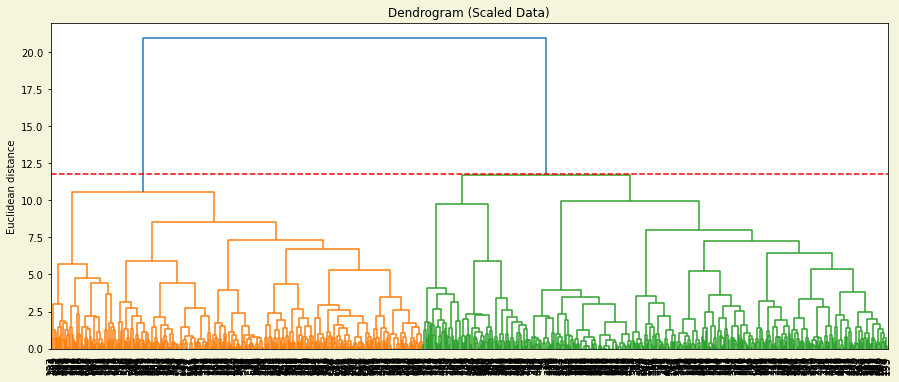

In [60]:
plt.figure(figsize=(15,6),facecolor='beige')
dendrogrm = sch.dendrogram(sch.linkage(scaled_df, method = 'ward'),labels=scaled_df.index)
plt.axhline(y=11.8, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Dendrogram (Scaled Data)')
plt.ylabel('Euclidean distance')
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering
#for dimension reduced data :PCA
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(df_r_df)


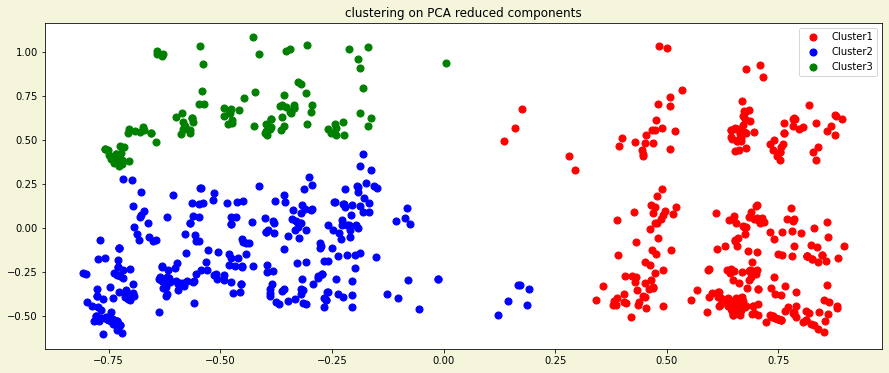

In [75]:
plt.figure(figsize=(15,6),facecolor='beige')
plt.scatter(df_r[y_hc== 0, 0], df_r[y_hc== 0, 1], s = 50, c = 'red', label = 'Cluster1')
plt.scatter(df_r[y_hc == 1, 0], df_r[y_hc== 1, 1], s = 50, c = 'blue', label = 'Cluster2')
plt.scatter(df_r[y_hc == 2, 0], df_r[y_hc== 2, 1], s = 50, c = 'green', label = 'Cluster3')
plt.title('clustering on PCA reduced components')
plt.legend()

In [76]:
#for scaled data
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(scaled_df)


In [79]:
dendo_scaled_df=scaled_df.copy()
dendo_scaled_df['y_hc3']=y_hc3

In [82]:
dendo_scaled_df.y_hc3.value_counts()

0    329
1    316
2     95
Name: y_hc3, dtype: int64

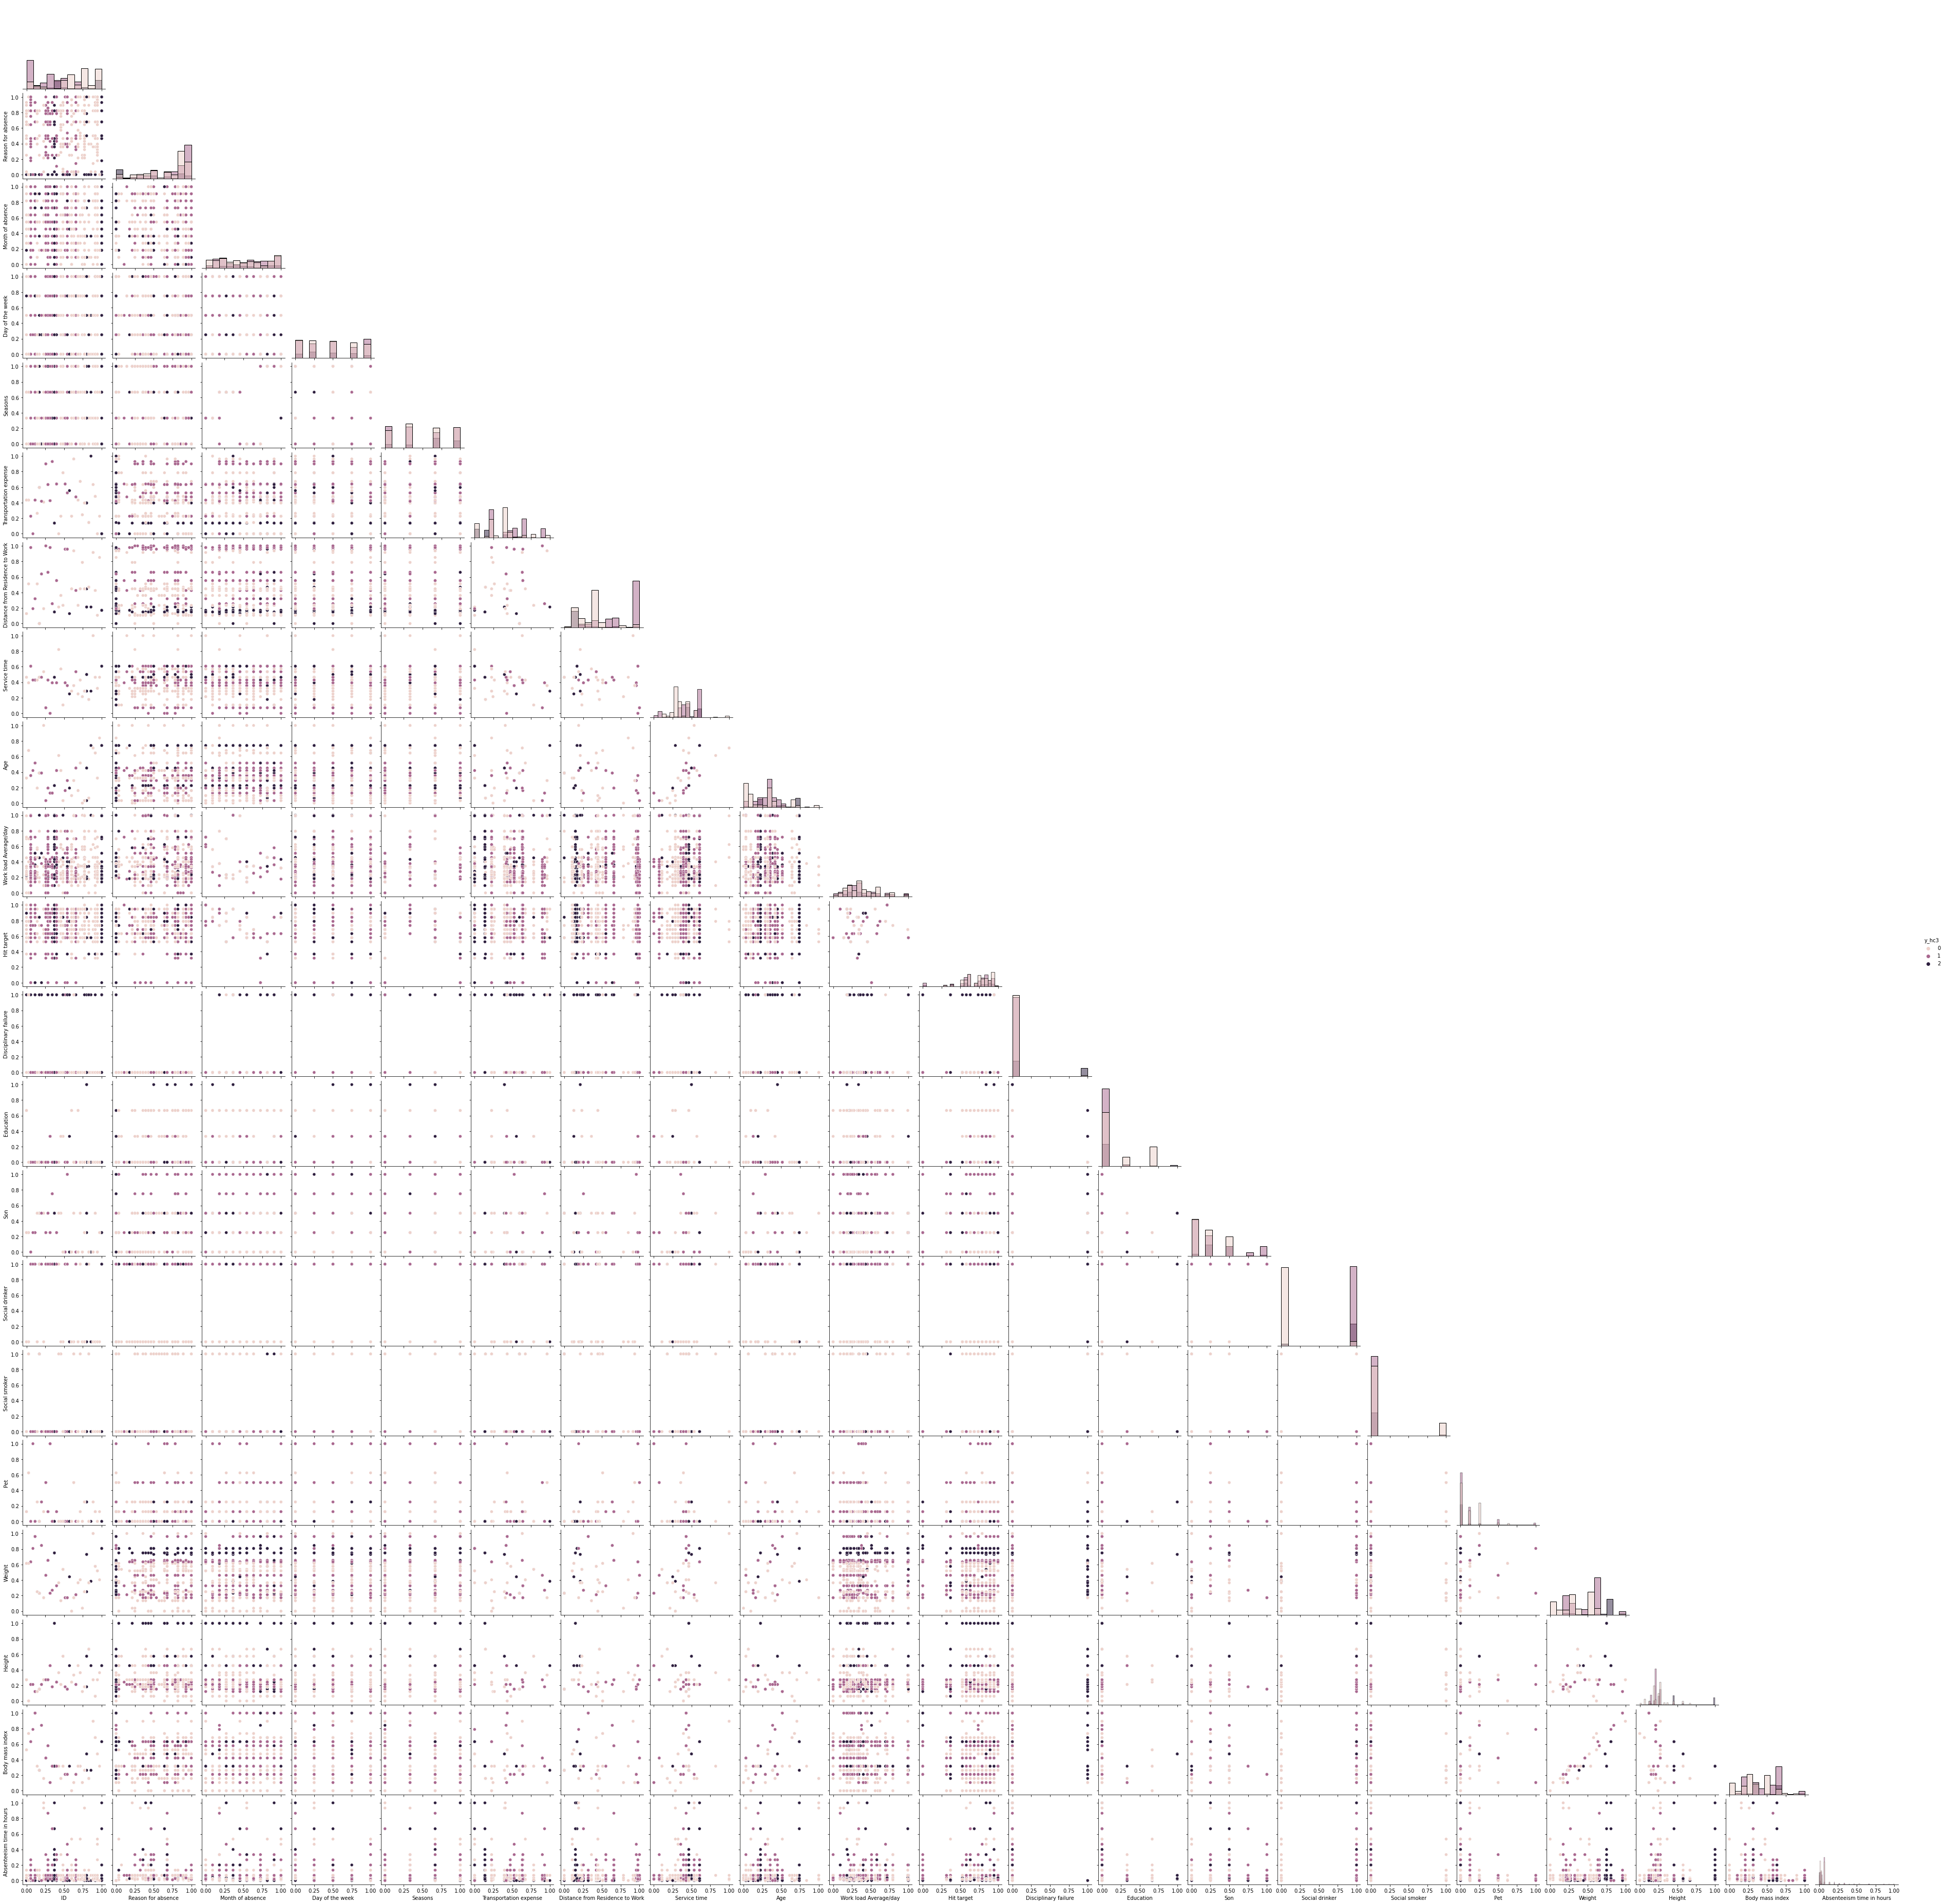

In [80]:
sns.set_palette("bright")
sns.pairplot(dendo_scaled_df, diag_kind="hist", hue ="y_hc3", corner=True)
plt.show()

In [77]:
silhoutte = silhouette_score(df_r_df,y_hc)
silhoutte1 = silhouette_score(scaled_df,y_hc3)
print('Silhoutte score of PCA Data :',silhoutte)
print('Silhoutte score of scaled Data :',silhoutte1)

Silhoutte score of PCA Data : 0.5277511021304461
Silhoutte score of scaled Data : 0.1996133579944893


# OBSERVATION : Silhoutte score of Dimension Reduced Data (PCA) is better for 4 clusters

# DBSCAN clustering algorithm

In [65]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(df_r)
distances, indices = nbrs.kneighbors(df_r)

In [66]:
neigh2 = NearestNeighbors(n_neighbors=2)
nbrs2 = neigh2.fit(scaled_df)
distances2, indices2 = nbrs2.kneighbors(scaled_df)

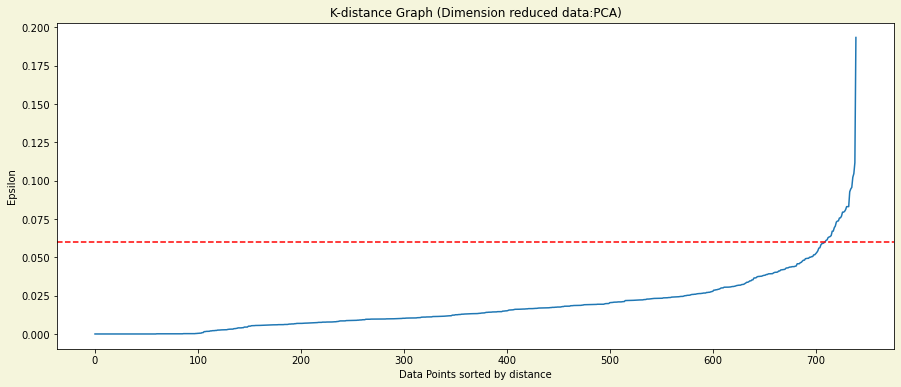

In [67]:
# Plotting K-distance Graph
plt.figure(figsize=(15,6),facecolor='beige')
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.axhline(y=0.06, color='r', linestyle='--')
plt.title('K-distance Graph (Dimension reduced data:PCA)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon');

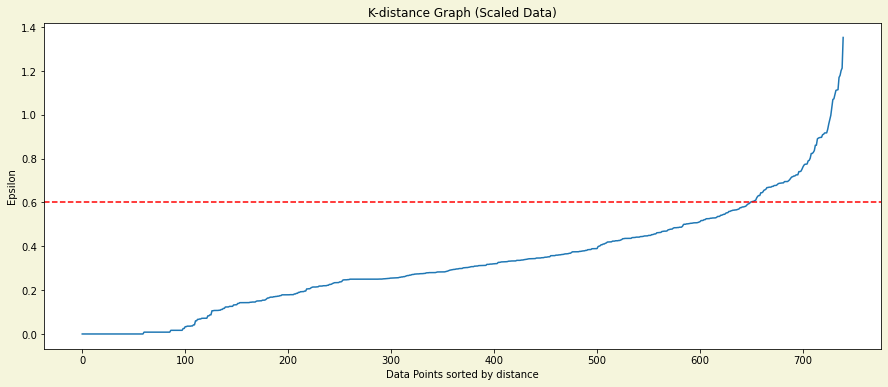

In [68]:
# Plotting K-distance Graph
plt.figure(figsize=(15,6),facecolor='beige')
distances2 = np.sort(distances2, axis=0)
distances2 = distances2[:,1]
plt.plot(distances2)
plt.axhline(y=0.6, color='r', linestyle='--')
plt.title('K-distance Graph (Scaled Data)')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.show()

In [69]:
#for dimension reduced data :PCA
from sklearn.cluster import DBSCAN
eps=0.06
for min_samples in [2,4,5,6,10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(df_r)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 0.06 | min_samples=  2 | obtained clustering:  35
eps= 0.06 | min_samples=  4 | obtained clustering:  22
eps= 0.06 | min_samples=  5 | obtained clustering:  19
eps= 0.06 | min_samples=  6 | obtained clustering:  18
eps= 0.06 | min_samples=  10 | obtained clustering:  18
eps= 0.06 | min_samples=  11 | obtained clustering:  21
eps= 0.06 | min_samples=  12 | obtained clustering:  16
eps= 0.06 | min_samples=  13 | obtained clustering:  12


In [70]:
#for dimension reduced data :PCA
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.06,min_samples=12)
dbscan_opt.fit(df_r)
df_r_df['DBSCAN_opt_labels']=dbscan_opt.labels_
df_r_df['DBSCAN_opt_labels'].value_counts()

-1     366
 3      84
 0      52
 1      37
 5      33
 6      20
 8      20
 7      19
 2      17
 10     17
 4      14
 14     14
 12     14
 11     12
 9      12
 13      9
Name: DBSCAN_opt_labels, dtype: int64

In [71]:
#for scaled data
eps=0.6
for min_samples in [2,4,5,6,10, 11, 12, 13]:
    clusterer2 = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels2 = clusterer2.fit_predict(scaled_df)
    x= cluster_labels2 +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', len(results))

eps= 0.6 | min_samples=  2 | obtained clustering:  66
eps= 0.6 | min_samples=  4 | obtained clustering:  29
eps= 0.6 | min_samples=  5 | obtained clustering:  24
eps= 0.6 | min_samples=  6 | obtained clustering:  20
eps= 0.6 | min_samples=  10 | obtained clustering:  9
eps= 0.6 | min_samples=  11 | obtained clustering:  10
eps= 0.6 | min_samples=  12 | obtained clustering:  9
eps= 0.6 | min_samples=  13 | obtained clustering:  8


In [72]:
#for scaled data
dbscan_opt=DBSCAN(eps=0.6,min_samples=12)
dbscan_opt.fit(scaled_df)
scaled_df['DBSCAN_opt_labels']=dbscan_opt.labels_
scaled_df['DBSCAN_opt_labels'].value_counts()

-1    471
 1    100
 2     64
 6     25
 5     20
 3     17
 0     16
 4     16
 7     11
Name: DBSCAN_opt_labels, dtype: int64

In [73]:
from sklearn import metrics
print("Silhouette Coefficient with dimension reduced data: %0.3f" % metrics.silhouette_score(df_r_df, df_r_df['DBSCAN_opt_labels']))
print("Silhouette Coefficient with scaled data: %0.3f" % metrics.silhouette_score(scaled_df, scaled_df['DBSCAN_opt_labels']))

Silhouette Coefficient with dimension reduced data: 0.687
Silhouette Coefficient with scaled data: 0.211


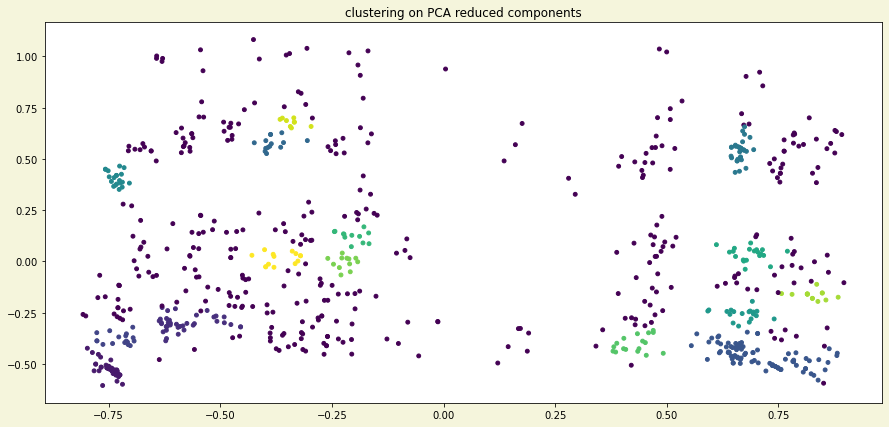

In [74]:
plt.figure(figsize=(15,7),facecolor='beige')
plt.scatter(df_r_df[0], df_r_df[1], c=df_r_df['DBSCAN_opt_labels'],s=15)
plt.title('clustering on PCA reduced components');

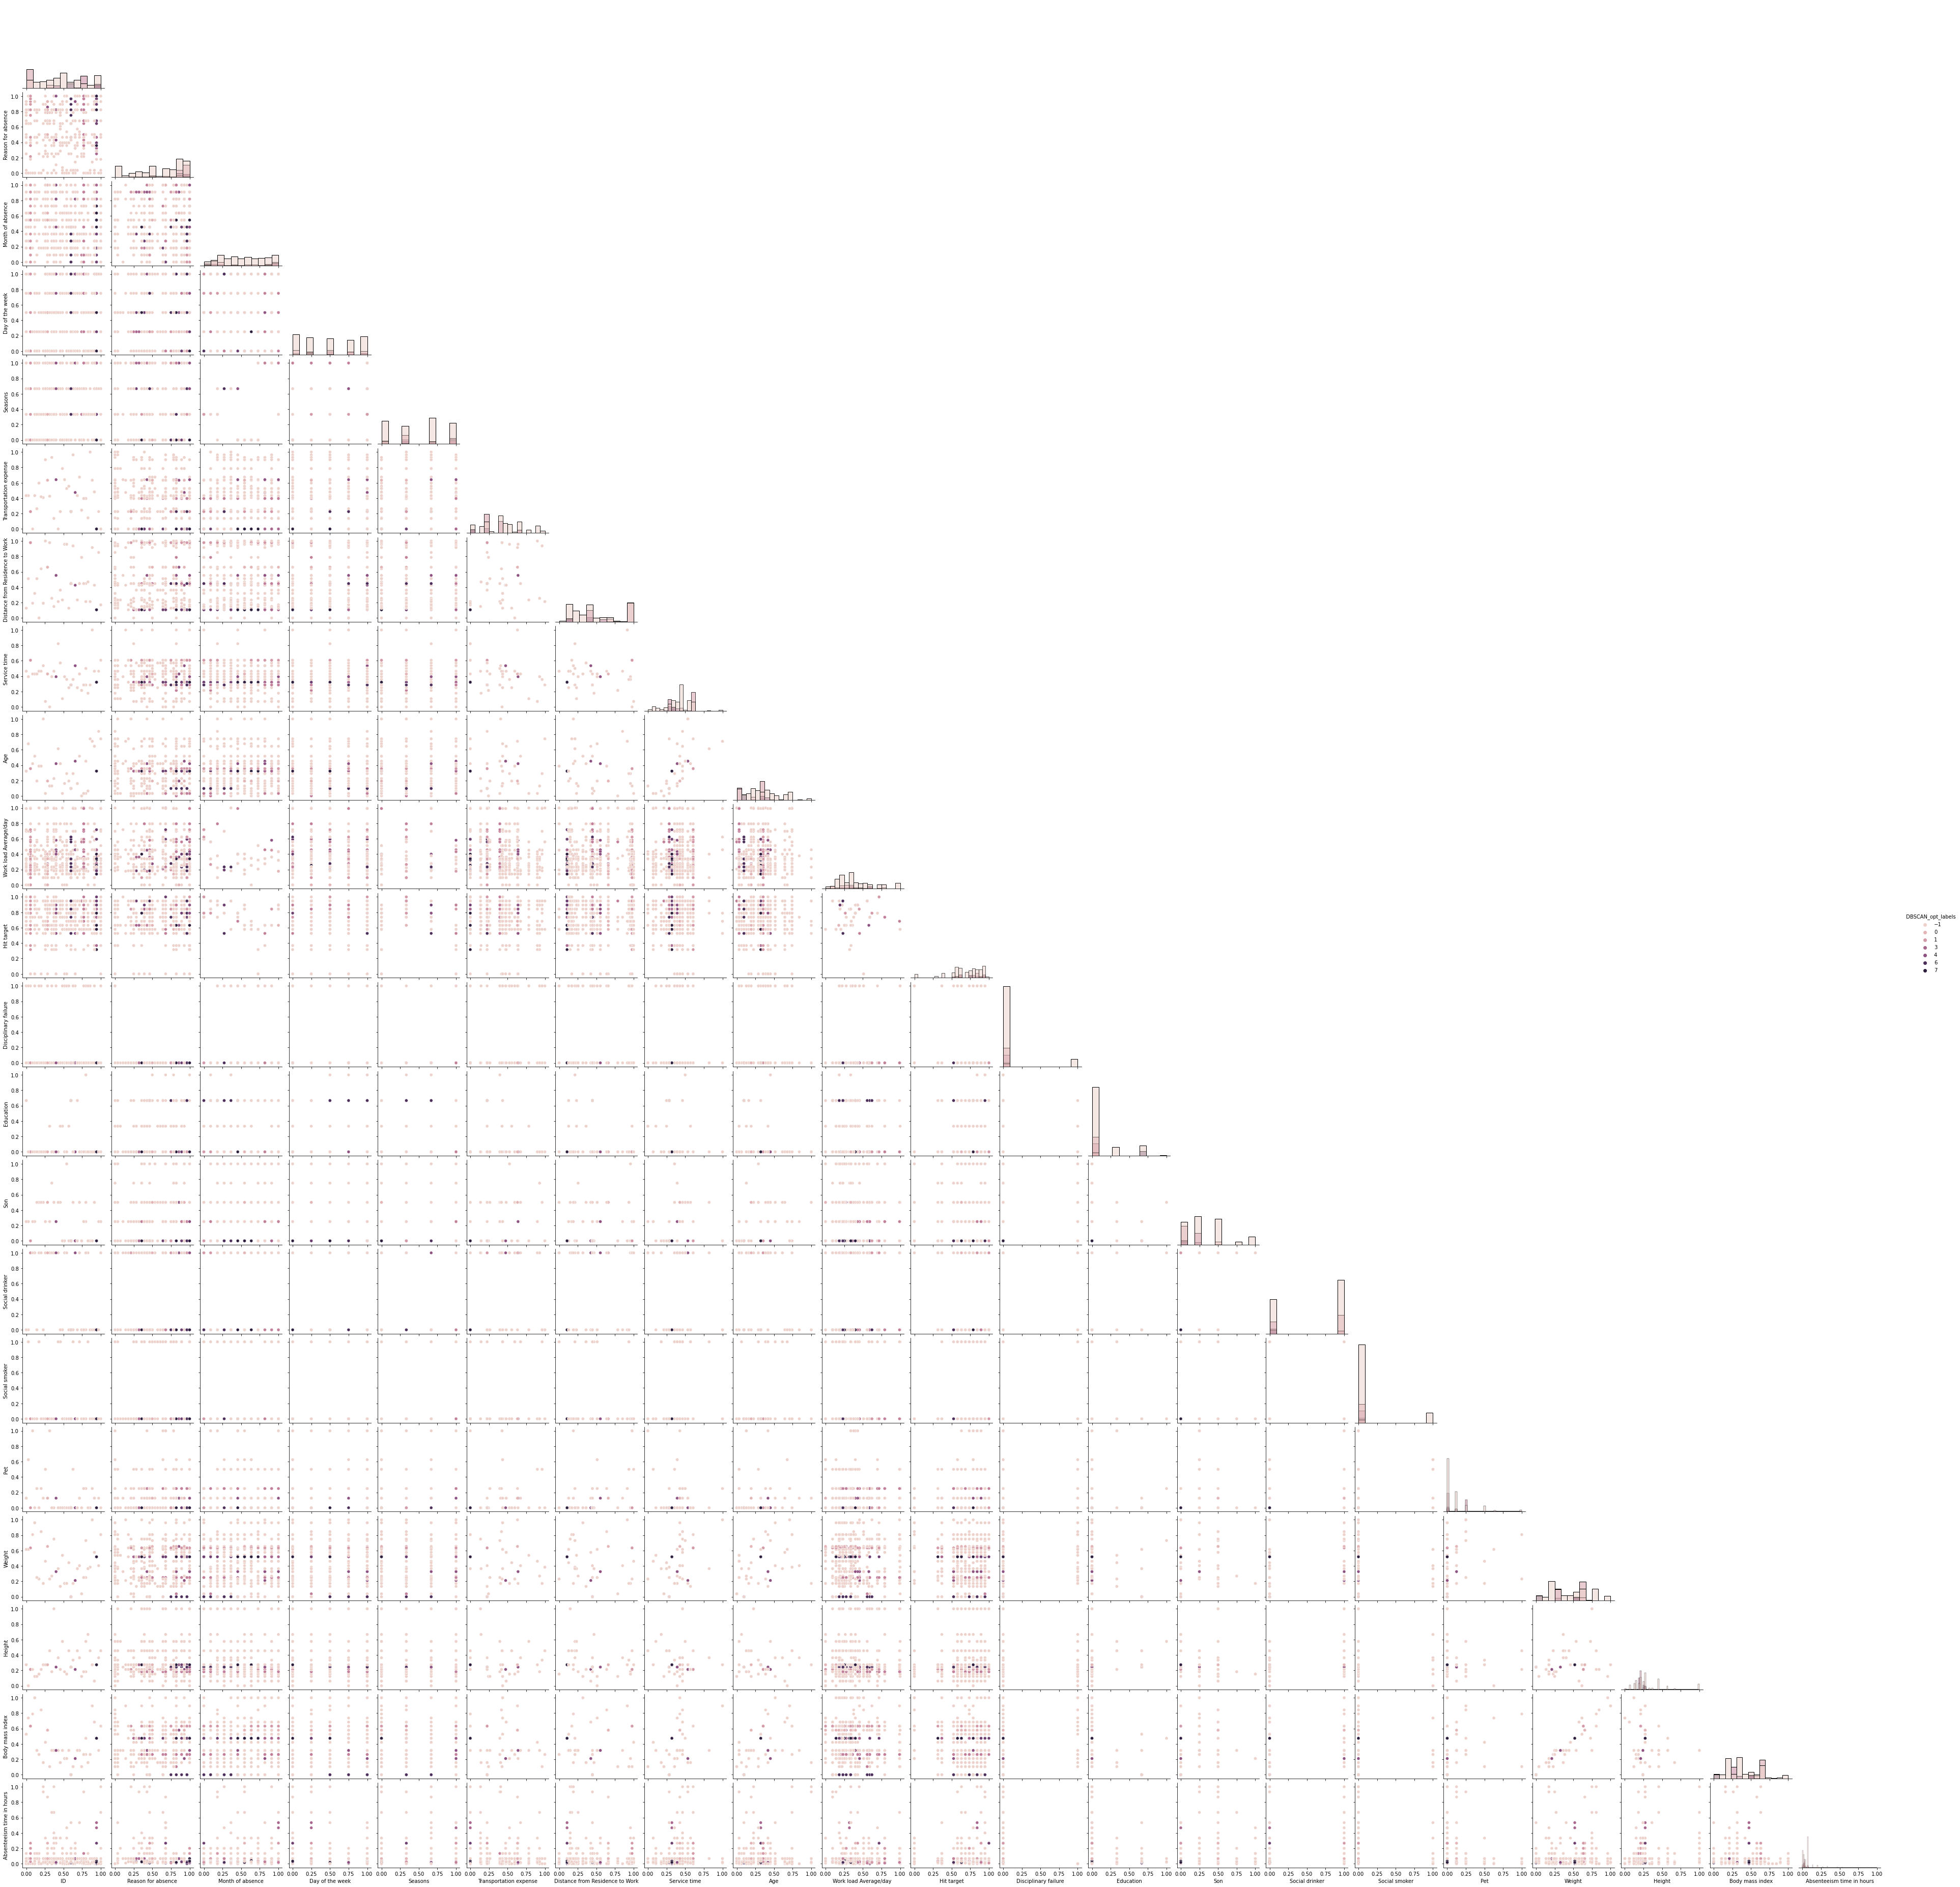

In [94]:
sns.set_palette("bright")
sns.pairplot(scaled_df, diag_kind="hist", hue ="DBSCAN_opt_labels", corner=True)
plt.show()

In [88]:
data=pd.DataFrame()
data['Model']=['Kmeans Clustering(scaled data)','Kmeans Clustering(PCA)','Agglomerative Hierarchical clustering(scaled data)','Agglomerative Hierarchical clustering(PCA)','DBSCAN clustering algorithm(scaled data)','DBSCAN clustering algorithm(PCA)']
data['silhouette score']=[0.19,0.53,0.48,0.651,0.236,0.66]
data

Model  silhouette score
0                     Kmeans Clustering(scaled data)             0.190
1                             Kmeans Clustering(PCA)             0.530
2  Agglomerative Hierarchical clustering(scaled d...             0.480
3         Agglomerative Hierarchical clustering(PCA)             0.651
4           DBSCAN clustering algorithm(scaled data)             0.236
5                   DBSCAN clustering algorithm(PCA)             0.660

# Conclusion: We see that silhouette score DBSCAN clustering algorithm(PCA) is 0.66 and it is Good clustering Model.

# Conclusion:
    
### 1. we can see that employees with education 1 tend to be more absent compared to others Employees.
### 2. 23rd Reason is most used reason by the education 1 Employees.
### 3. Reason for absence 0,13,19 and 28 are mostly used by Social drinker.
### 4. Employees who are Social drinker are mostly Absent for 8 hours.
### 5. The employees with Reason for absence 0 have made Disciplinary failure.

